In [215]:
import pandas as pd
import pygmt
import csv
import numpy as np

In [217]:
# 
stations = pd.read_table(r"C:\Users\dodos\diplomski\sjever\station.lst",header=None, sep=' ')

# opcije za path su r"Filter_7-20s_SNR_3_tw_50\\" ili r"Filter_8-20s_SNR_4_tw_50\\"
#path = r"Filter_7-20s_SNR_3_tw_50\\"
path = r"Filter_7-25s_SNR_3.5_tw_50//"

data=list()
data_null=list()
data_good_only=list()
data_total=list()
potresi_good_average = list()

# pretvorba rezultata u odgovarajuči format
counter_total = 0
counter_good = 0

for station,lat,long in zip(stations[0],stations[2],stations[3]):
    with open(
            path + str(station) + r"\Single_Splitting\splitting_results_auto.txt",
            encoding='utf-8') as autofile:
        csvreader = csv.reader(autofile, delimiter=' ')
        stations = []
        for row in csvreader:
            if 'category' in row:
                index = row.index('category')
                stations.append(row[:index + 1])
                stations.append(row[-len(row) + index + 1:])
            else:
                stations.append(row)
    # spremanje modificiranih datoteka kao _auto_moded kako bi se lakše parsirali kasnije
    with open( path + str(station) + r"\Single_Splitting\splitting_results_auto_moded.txt", 'w') as out:
        for row in stations:
            for item in row:
                out.write(item + ' ')
            out.write('\n')

    df = pd.read_table(path + str(station) + r"\Single_Splitting\splitting_results_auto_moded.txt", sep=' ', )

# odabir samo dobrih i average rezultata
    for i in range(0,len(df['baz'])):
        counter_total += 1
        data_total.append([station, lat, long, df['baz'][i], df['delta'][i], df['category'][i]])
        if df['category'][i] == 'good' or df['category'][i]  == 'average': 
            counter_good += 1
            potresi_good_average.append([df['lat'][i], df['lon'][i]])
            data.append([station, lat, long, df['baz'][i], df['delta'][i]])
        if df['category'][i] == 'good' : 
            data_good_only.append([station, lat, long, df['baz'][i], df['delta'][i]])
            
# odabir samo null rezultata
        if df['category'][i] == 'null-measurement':
            data_null.append([station, lat, long, df['baz'][i], df['delta'][i]])

In [256]:
print('ukupno seizmograma', counter_total)
print('dobrih i zadovoljavajucih seizmograma', counter_good)

ukupno seizmograma 641
dobrih i zadovoljavajucih seizmograma 102


In [255]:
df_data_total = pd.DataFrame(data_total, columns=['Station', 'Latitude', 'Longitude', "phi", "dt", "category"])
df_data_total.dropna(inplace=True)

df_data_total['Latitude'] = pd.to_numeric(df_data_total['Latitude'], errors='coerce')
df_data_total['Longitude'] = pd.to_numeric(df_data_total['Longitude'], errors='coerce')
df_data_total['phi'] = pd.to_numeric(df_data_total['phi'], errors='coerce')
df_data_total['dt'] = pd.to_numeric(df_data_total['dt'], errors='coerce')

#stations = pd.read_table(r"C:\Users\dodos\diplomski\sjever\station.lst",header=None, sep=' ')
stations = pd.read_table(r"station.lst",header=None, sep=' ')
stations.columns = ['Name', 'network', 'latitude', 'longitude']

for station in stations['Name']:
    #for phi in df_data_total.loc[df_data_total['Station'] == station]['phi']:
    print(station, len(df_data_total.loc[df_data_total['Station'] == station]))

A250A 16
A251A 11
A252A 30
A253A 20
A254A 8
A255A 8
A050A 35
A051A 18
A052A 16
MOSL 43
DUGI 41
KALN 4
KIJV 39
KSY 31
LOBO 18
MORI 44
NVLJ 12
OZLJ 29
PLIT 32
PTJ 41
RABC 9
SLNJ 22
UDBI 34
VIRC 27
ZIRJ 53


In [220]:
df_data_total

Station   Latitude  Longitude        phi        dt          category
0     A250A  45.084000  14.910600  291.73800  4.000000  null-measurement
1     A250A  45.084000  14.910600  202.92544  4.000000  null-measurement
2     A250A  45.084000  14.910600  304.35638  4.000000  null-measurement
3     A250A  45.084000  14.910600  248.19091  0.205128  null-measurement
4     A250A  45.084000  14.910600   47.32671  4.000000  null-measurement
..      ...        ...        ...        ...       ...               ...
636    ZIRJ  43.654255  15.643891   71.45245  1.025641              poor
637    ZIRJ  43.654255  15.643891   71.42232  1.333333              good
638    ZIRJ  43.654255  15.643891   71.19208  1.641026              poor
639    ZIRJ  43.654255  15.643891   74.00699  0.717949              good
640    ZIRJ  43.654255  15.643891   71.34343  1.025641              poor

[641 rows x 6 columns]

In [221]:
#pretvaranje liste dobrih i average rezultata u dataframe

df_category_good = pd.DataFrame(data, columns=['Station', 'Latitude', 'Longitude', "phi", "dt"])
df_category_good.dropna(inplace=True)

df_category_good['Latitude'] = pd.to_numeric(df_category_good['Latitude'], errors='coerce')
df_category_good['Longitude'] = pd.to_numeric(df_category_good['Longitude'], errors='coerce')
df_category_good['phi'] = pd.to_numeric(df_category_good['phi'], errors='coerce')
df_category_good['dt'] = pd.to_numeric(df_category_good['dt'], errors='coerce')

In [222]:
# samo "good" rezultati
df_category_good_only = pd.DataFrame(data_good_only, columns=['Station', 'Latitude', 'Longitude', "phi", "dt"])
df_category_good_only.dropna(inplace=True)

df_category_good_only['Latitude'] = pd.to_numeric(df_category_good_only['Latitude'], errors='coerce')
df_category_good_only['Longitude'] = pd.to_numeric(df_category_good_only['Longitude'], errors='coerce')
df_category_good_only['phi'] = pd.to_numeric(df_category_good_only['phi'], errors='coerce')
df_category_good_only['dt'] = pd.to_numeric(df_category_good_only['dt'], errors='coerce')

In [223]:
# null rezultati

dfdata_null = pd.DataFrame(data_null, columns=['Station', 'Latitude', 'Longitude', "phi", "dt"])
dfdata_null.dropna(inplace=True)

dfdata_null['Latitude'] = pd.to_numeric(dfdata_null['Latitude'], errors='coerce')
dfdata_null['Longitude'] = pd.to_numeric(dfdata_null['Longitude'], errors='coerce')
dfdata_null['phi'] = pd.to_numeric(dfdata_null['phi'], errors='coerce')
dfdata_null['dt'] = pd.to_numeric(dfdata_null['dt'], errors='coerce')

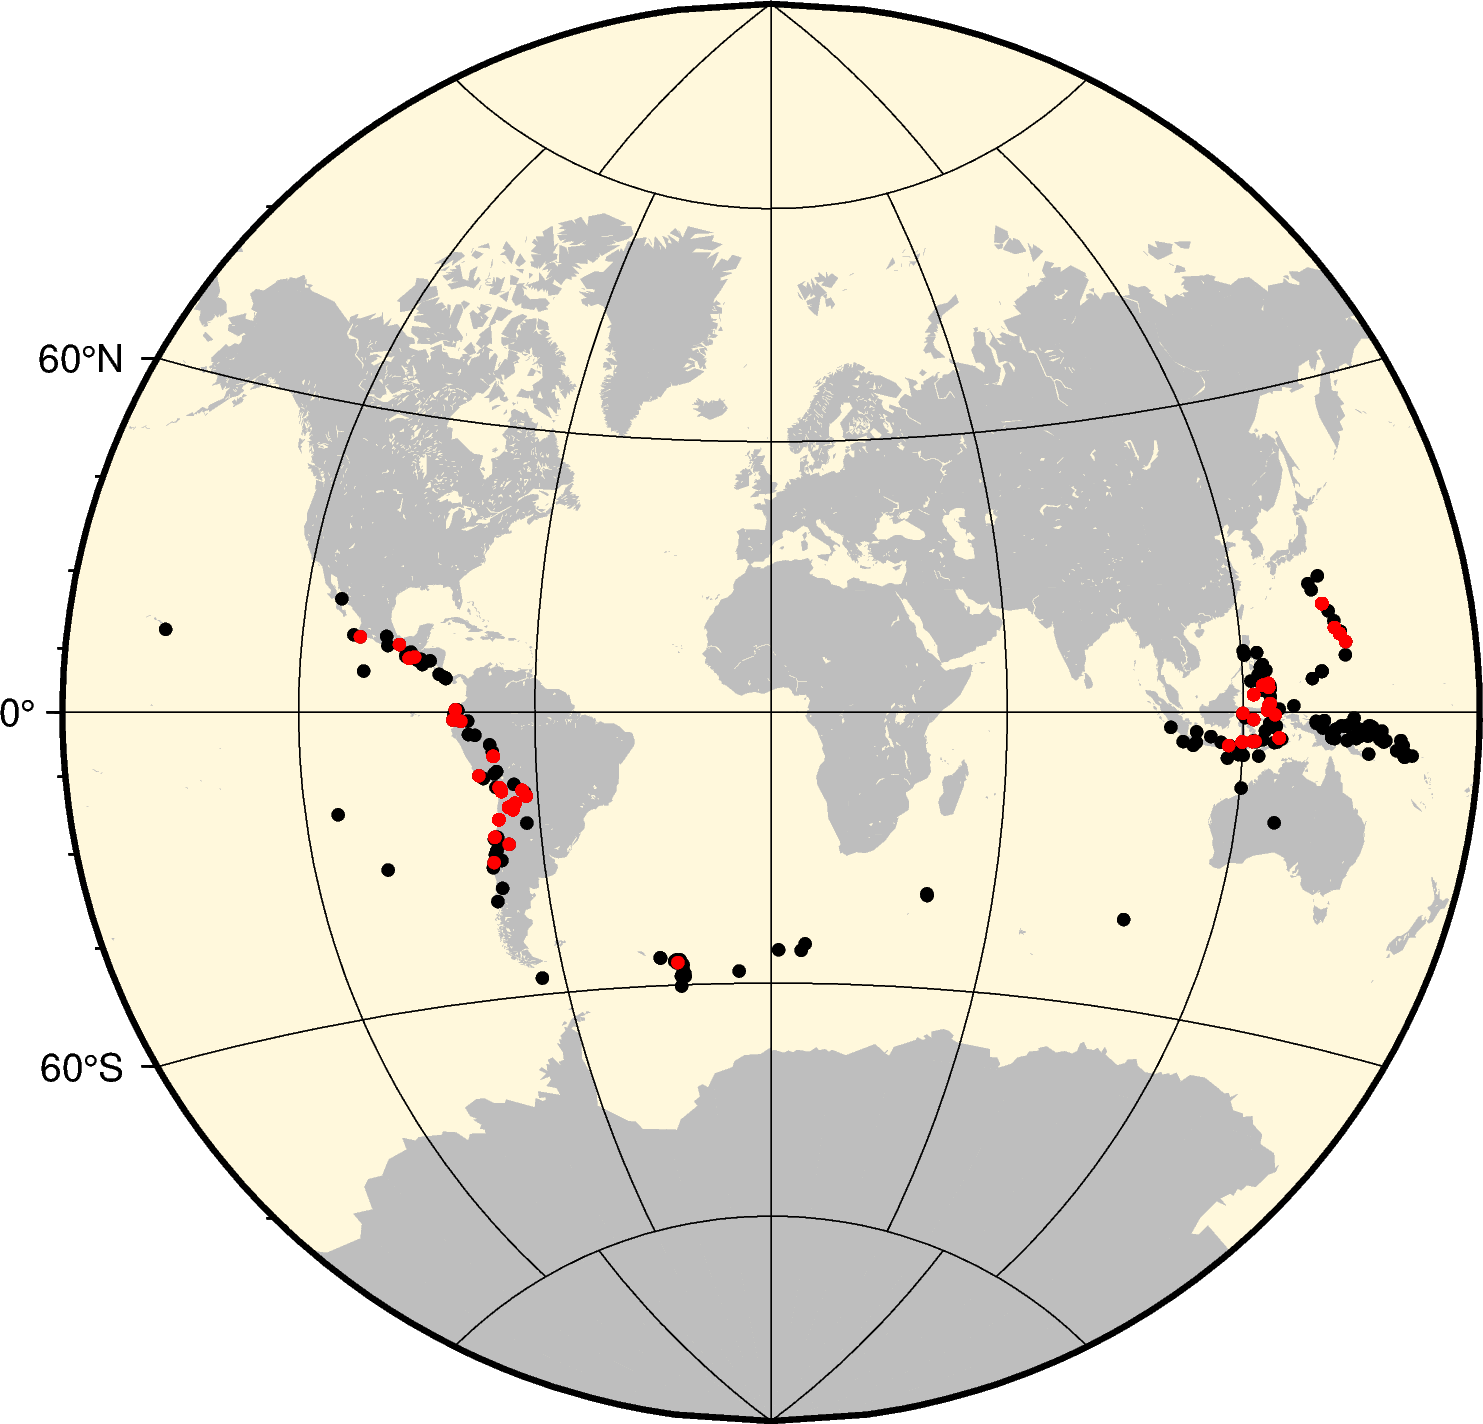

In [257]:
df_locs = pd.read_table('popis_potresa.csv', sep=',' )

fig_radial = pygmt.Figure()
fig_radial.coast(region="d", projection="V12c", land="gray", water="cornsilk", frame="afg")
fig_radial.plot(
        x=df_locs['longitude'],
        y=df_locs['latitude'],
        style="c0.1c",
        color="black",
        pen='black',
    )


potresi_good_average_df = pd.DataFrame(potresi_good_average, columns=['Latitude', 'Longitude'])

potresi_good_average_df.dropna(inplace=True)
potresi_good_average_df

fig_radial.plot(
        x=potresi_good_average_df['Longitude'],
        y=potresi_good_average_df['Latitude'],
        style="c0.1c",
        color="red",
        pen='red',
    )


fig_radial.show()

Svi epicentri prikazani u Van Den Grinten projekciji koji zadovoljavaju uvijet da su >90 i <135 stupnjeva udaljeni od mjesta promatranja. Crveno su naznačeni događaji koji su dali rezultat dobre ili prosiječne kvalitete


coast [WARNING]: Fill/clip continent option (-G) may not work for this projection.
coast [WARNING]: If the antipode (8.43287e-312/1.01845e-312) is in the ocean then chances are good it will work.
coast [WARNING]: Otherwise, avoid projection center coordinates that are exact multiples of 195 degrees.


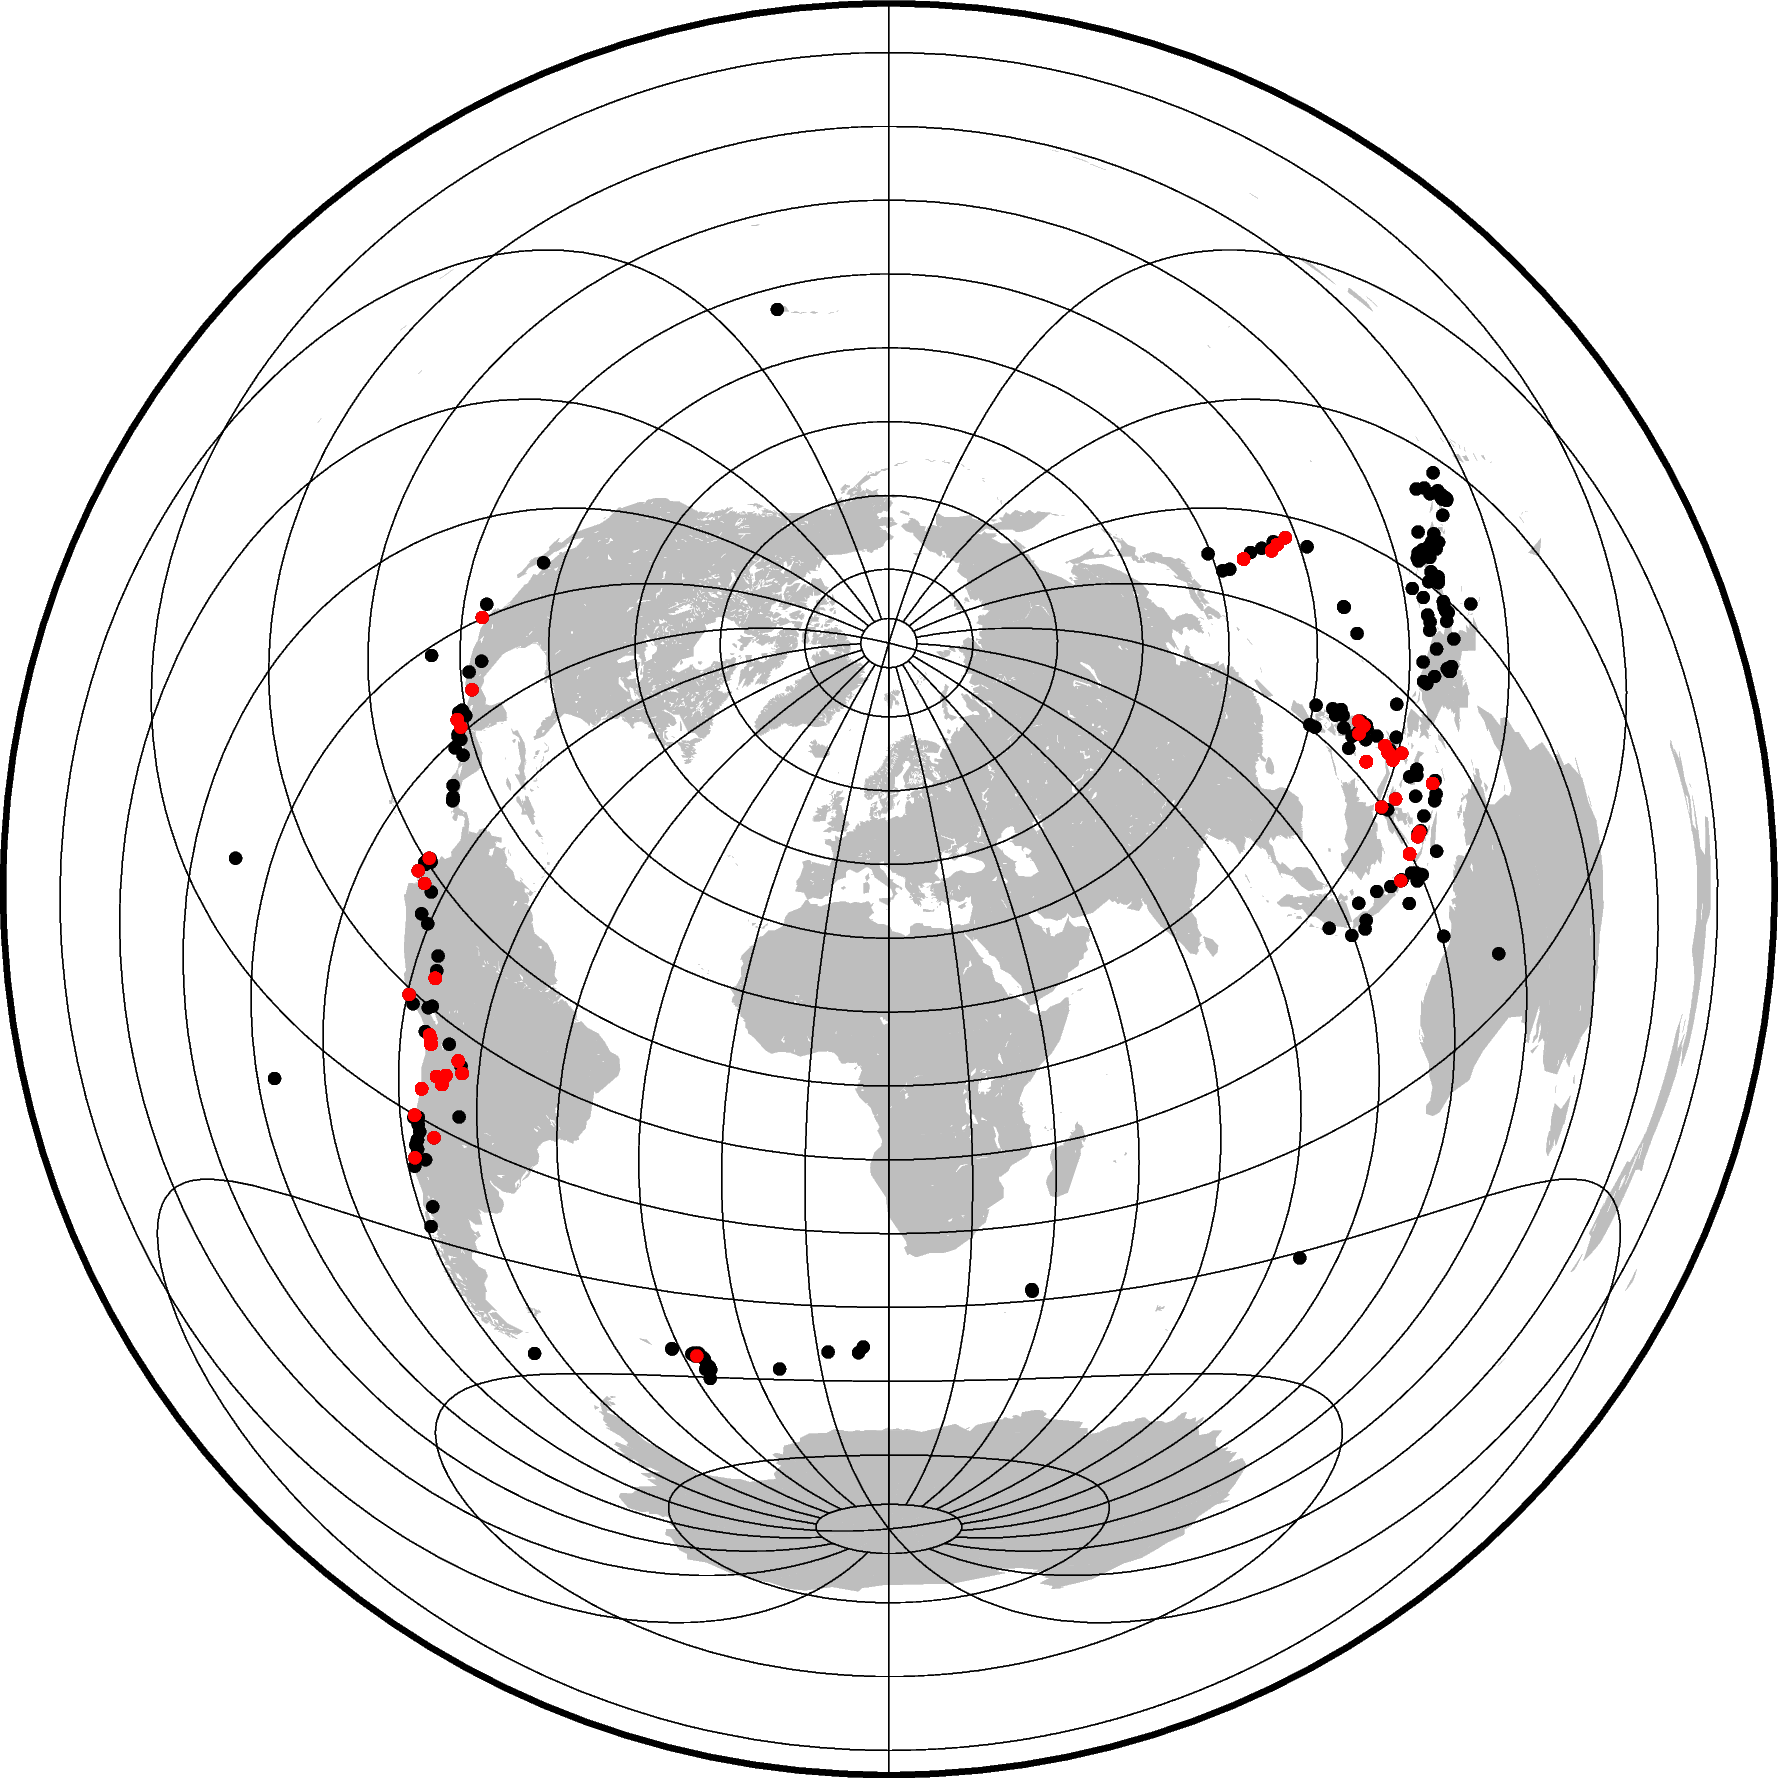

In [225]:
fig = pygmt.Figure()
fig.coast(projection="E15/40/15c", region="g", frame="g", land="gray")

fig.plot(
        x=df_locs['longitude'],
        y=df_locs['latitude'],
        style="c0.1c",
        color="black",
        pen='black',
    )


potresi_good_average_df = pd.DataFrame(potresi_good_average, columns=['Latitude', 'Longitude'])

potresi_good_average_df.dropna(inplace=True)
potresi_good_average_df

fig.plot(
        x=potresi_good_average_df['Longitude'],
        y=potresi_good_average_df['Latitude'],
        style="c0.1c",
        color="red",
        pen='red',
    )

fig.show()


Svi epicentri prikazani u Ekvidistantnoj azimutalnoj projekciji koji zadovoljavaju uvijet da su >90 i <135 stupnjeva udaljeni od mjesta promatranja. Crveno su naznačeni događaji koji su dali rezultat dobre ili prosiječne kvalitete

C:\Users\dodos\AppData\Local\Temp\ipykernel_9020\3034345048.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  temp_stations = stations.loc[stations['Name'].str.contains("([A]\d)", case=True)]
C:\Users\dodos\AppData\Local\Temp\ipykernel_9020\3034345048.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  perm_stations = stations.loc[stations['Name'].str.contains("([A-Z]{3,})", case=False)]


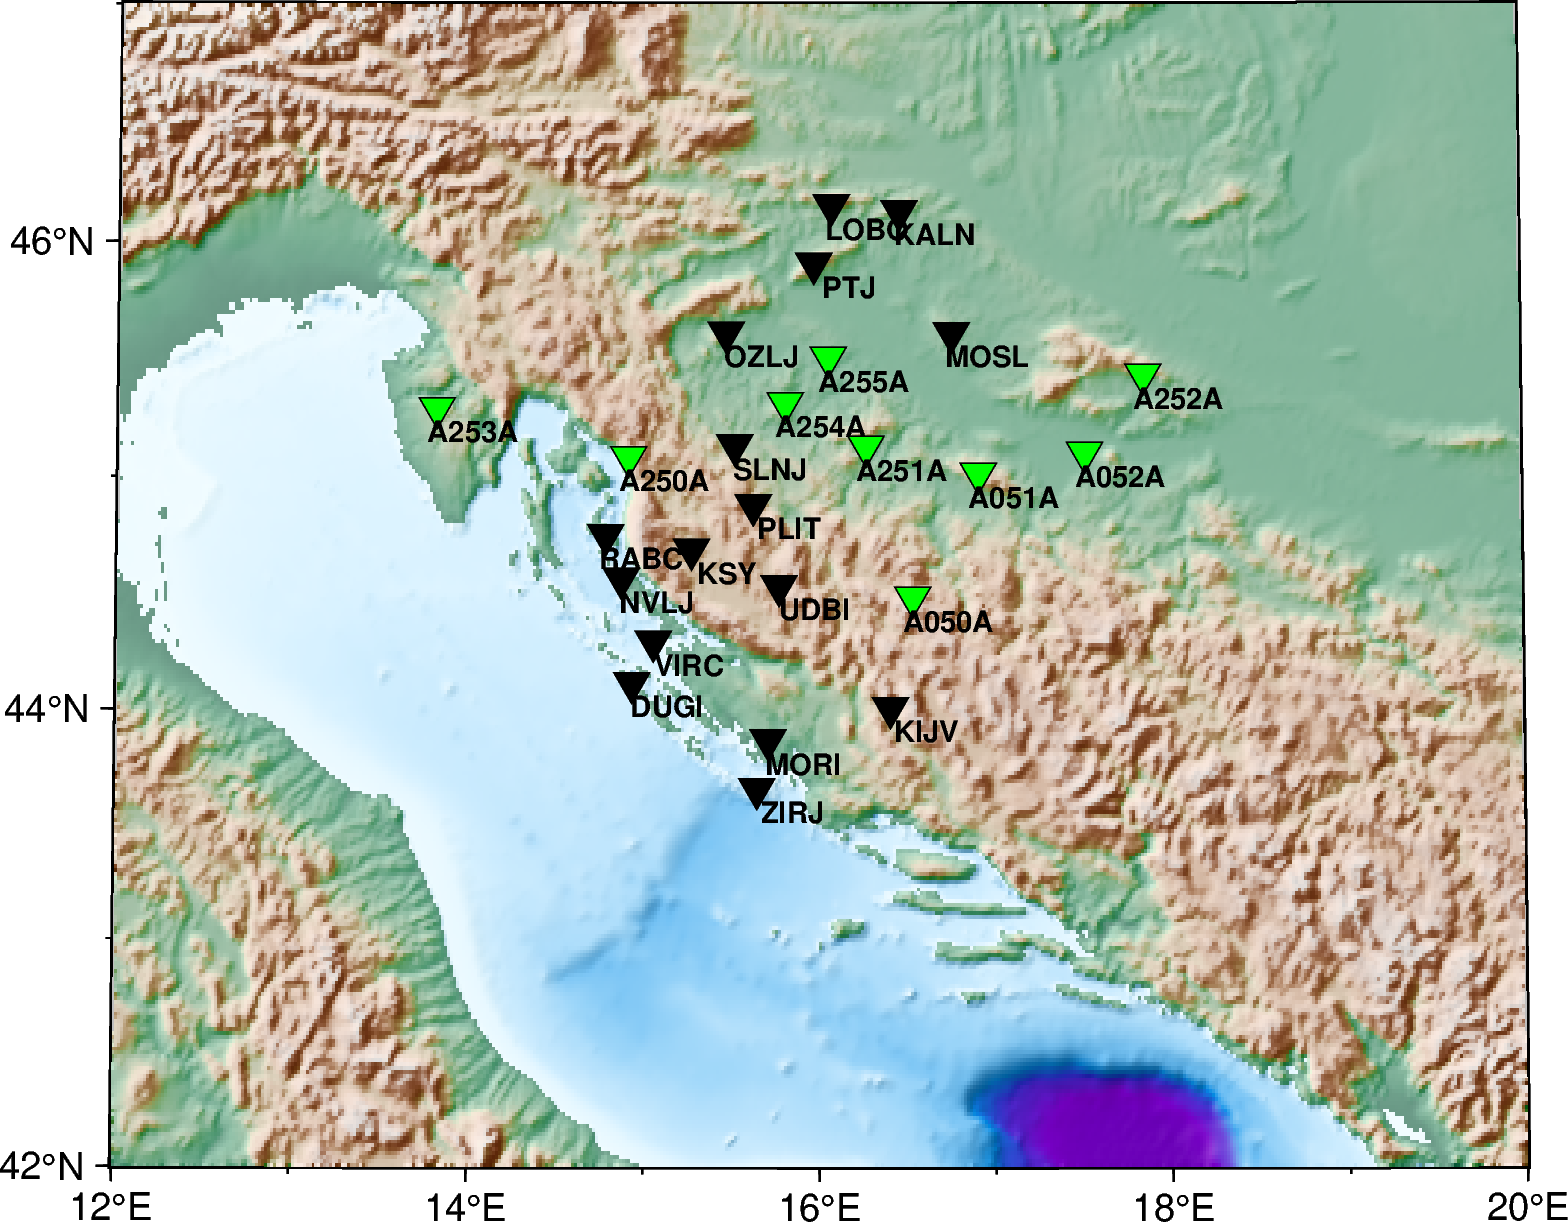

In [258]:
stations = pd.read_table(r"station.lst",header=None, sep=' ')
stations.columns = ['Name', 'network', 'latitude', 'longitude']


fig_stations = pygmt.Figure()
#fig_stations.basemap(region=[13, 19, 43, 46], projection="M5c", frame=True)
fig_stations.coast(
region=[12, 20, 42, 47], projection="V12c", land="gray", water="lightblue", frame="afg", borders = 1)

pygmt.makecpt(cmap='terra', series="-7000/4000/100",
                      continuous=True)
fig_stations.grdimage(
    grid="@earth_relief_01m",
    shading=True,
    cmap='terra',
    )
temp_stations = stations.loc[stations['Name'].str.contains("([A]\d)", case=True)]
perm_stations = stations.loc[stations['Name'].str.contains("([A-Z]{3,})", case=False)]  
fig_stations.plot(
        x=temp_stations['longitude'],
        y=temp_stations['latitude'],
        style="i0.35c",
        color="green",
        pen='black',
    )
fig_stations.plot(
        x=perm_stations['longitude'],
        y=perm_stations['latitude'],
        style="i0.35c",
        color="black",
        pen='black',
    )
fig_stations.text(
        text=stations['Name'],
        x=stations['longitude'],
        y=stations['latitude'],
        font="7p,Helvetica-Bold,black",
        offset='0.3/-0.2')
fig_stations.show()

Ilustracija svih seizmoloških postaja koje su razmatrane u ovom radu. Zelenom bojom su naznačene one stanice koje pripadaju privremenoj mreži seizmografa. 

In [227]:
df_category_good = pd.DataFrame(data, columns=['Station', 'Latitude', 'Longitude', "phi", "dt"])

df_category_good['Latitude'] = pd.to_numeric(df_category_good['Latitude'], errors='coerce')
df_category_good['Longitude'] = pd.to_numeric(df_category_good['Longitude'], errors='coerce')
df_category_good['phi'] = pd.to_numeric(df_category_good['phi'], errors='coerce')
df_category_good['dt'] = pd.to_numeric(df_category_good['dt'], errors='coerce')        

In [228]:
# glavna funkcija za vizualizaciju rezultata SKS splittinga sa prikazom stanica 

def plot_splitting_map(sks_meas_all, boxcoordinates,
                       dcoord=0.5,
                       figname='splitting_map.png',
                       frame=["a1f0.25", "WSen"],
                       topo_data="@earth_relief_01m",
                       colormap="etopo1",
                       proj="M5c",
                       markerstyle="cc",
                       markersizescale=0.03*2,
                       markerstyle_nocmap="c0.25c",
                       markercolor="blue",
                       pencolor='black',
                       penwidth="1p",
                       dtscale=0.5,
                       measurement_cmap=True,
                       markercolormap="viridis",
                       colorbar=True,
                      legend=True):
    '''
    Plot the shear wave splitting measurements using pygmt
    param sks_meas_all: pandas dataframe with `Longitude`, `Latitude`, `phi`, and `dt` columns.
    param boxcoordinates: list with minimum longitude, maximum longitude, minimum latitude, maximum latitude
    param dcoord: offset of the map from the given coordinates
    param figname: output figure name
    param topo_data: topographic data str
    param colormap: colormap for the topographic data. Defaults to None
    param proj: projection of the map
    param measurement_cmap: boolean. plot markers using the colormap
    param markerstyle: marker style for colormapped markers
    param markerstyle_nocmap: marker style without colormap
    param markercolor: marker color without colormap
    param pencolor: pen color for the splitting lines
    param dtscale: scale for delay time on the map
    '''
    minlon, maxlon = boxcoordinates[0], boxcoordinates[1]
    minlat, maxlat = boxcoordinates[2], boxcoordinates[3]
    minlon, maxlon, minlat, maxlat = (
        minlon - dcoord,
        maxlon + dcoord,
        minlat - dcoord,
        maxlat + dcoord,
    )

    res = "f"

    fig = pygmt.Figure()
    fig.basemap(region=[minlon, maxlon, minlat, maxlat],
                projection=proj, frame=frame)
    if colormap is not None:
        pygmt.makecpt(cmap=colormap, series="-7000/4000/100",
                      continuous=True)
        fig.grdimage(
            grid=topo_data,
            shading=True,
            cmap=colormap,
        )

        fig.coast(
            frame=frame,
            resolution=res,
            shorelines=["1/0.2p,black", "2/0.05p,gray"],
            borders=1,
        )
    else:
        fig.coast(land="lightgray", water="skyblue", resolution=res,
                  shorelines=["1/0.2p,black", "2/0.05p,gray"],
                  borders=1,)

    phivals = 90-sks_meas_all['phi'].values
    dtvals = dtscale*sks_meas_all['dt'].values
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="i0.35c",
        color="black",
        pen='black',
    )
    
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="v0i+e",
        pen=penwidth+","+pencolor ,
        direction=[
            phivals,
            dtvals/2.5,        # skaliranje brzih osi sa obzirom na vrijeme 
        ],  # angle (from xaxis) and magnitude
    )
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="v0i+e",
        pen=penwidth+","+pencolor , 
        direction=[
            180+phivals,
            dtvals/2.5,        # skaliranje brzih osi sa obzirom na vrijeme
        ],  # angle (from xaxis) and magnitude

    )
    fig.text(
        text=sks_meas_all['Station'],
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
       # position="BR",
        font="5p,Helvetica-Bold,black",
        offset='0.3/-0.2'
    )
    if legend:
        delaytimearrays = [1.0, 2.0, 3.0]
        ydiff = 0.2
        xdiff = 2
        yloc = (maxlat-dcoord+2*ydiff)
        xloc = minlon+dcoord
        fig.plot(x=xloc+xdiff/2+0.05, y=yloc-len(delaytimearrays)/2*ydiff-0.05, style=f"r{len(delaytimearrays)}/{len(delaytimearrays)/2}",
                 color="white", pen="1p,black")

        xloc += xdiff
        for dltime in delaytimearrays:
            yloc -= ydiff
            fig.plot(
                x=xloc-xdiff,
                y=yloc,
                style="v0i+e",
                pen='black',
                direction=[
                    [0],
                    [dtscale*dltime],
                ],  # angle (from xaxis) and magnitude
            )
            fig.text(x=xloc, y=yloc,
                     text=f"{dltime} s", font="0.3c,Helvetica")

    fig.show()
    fig.savefig(figname, crop=True, dpi=1080)

In [229]:
minlon, maxlon = 13, 21
minlat, maxlat = 43, 47

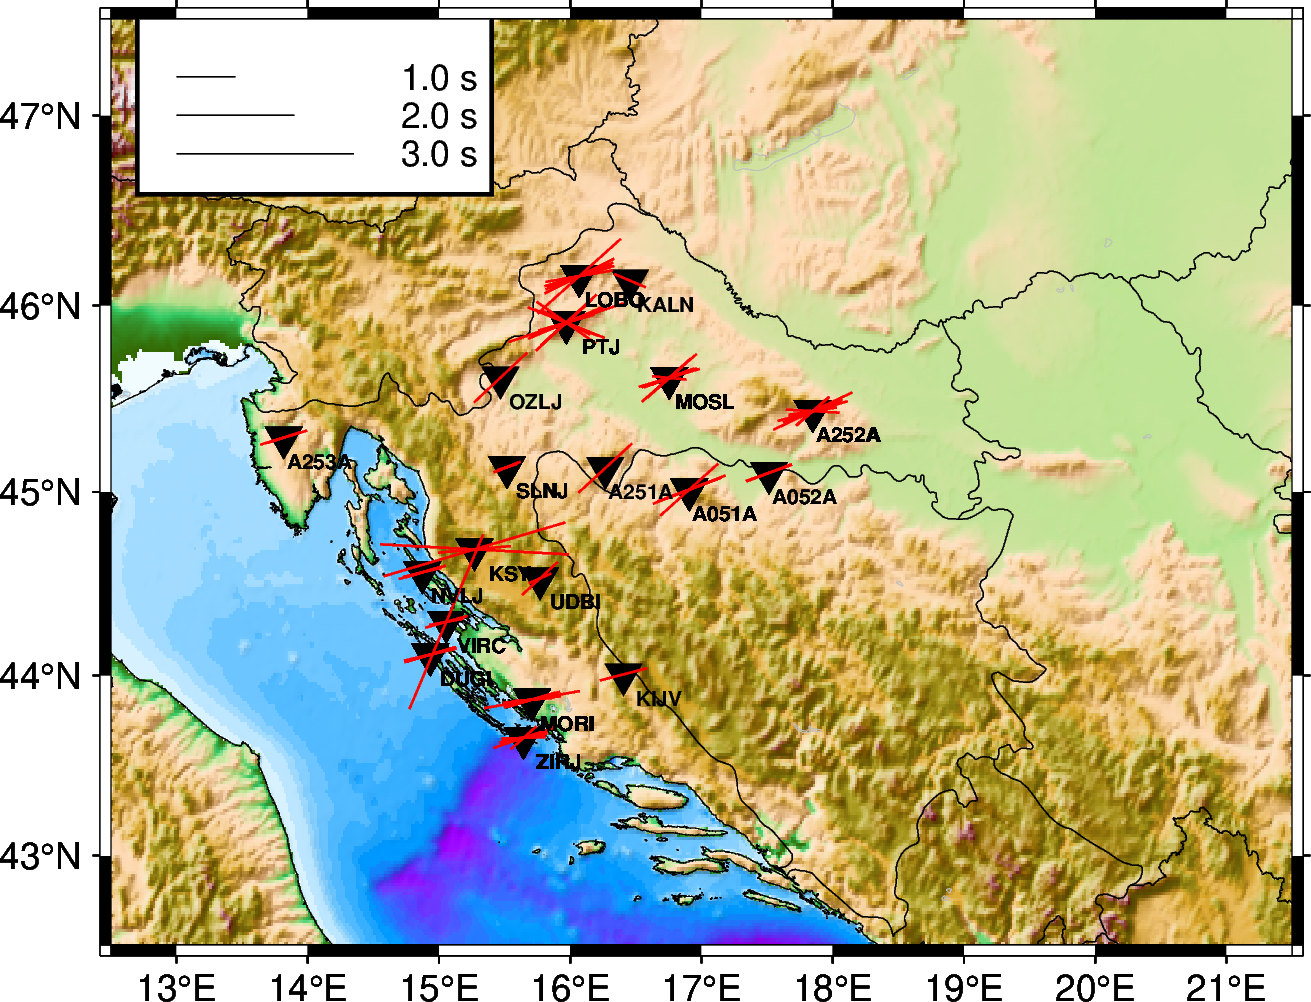

In [230]:
plot_splitting_map(df_category_good, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="0.5p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='red')

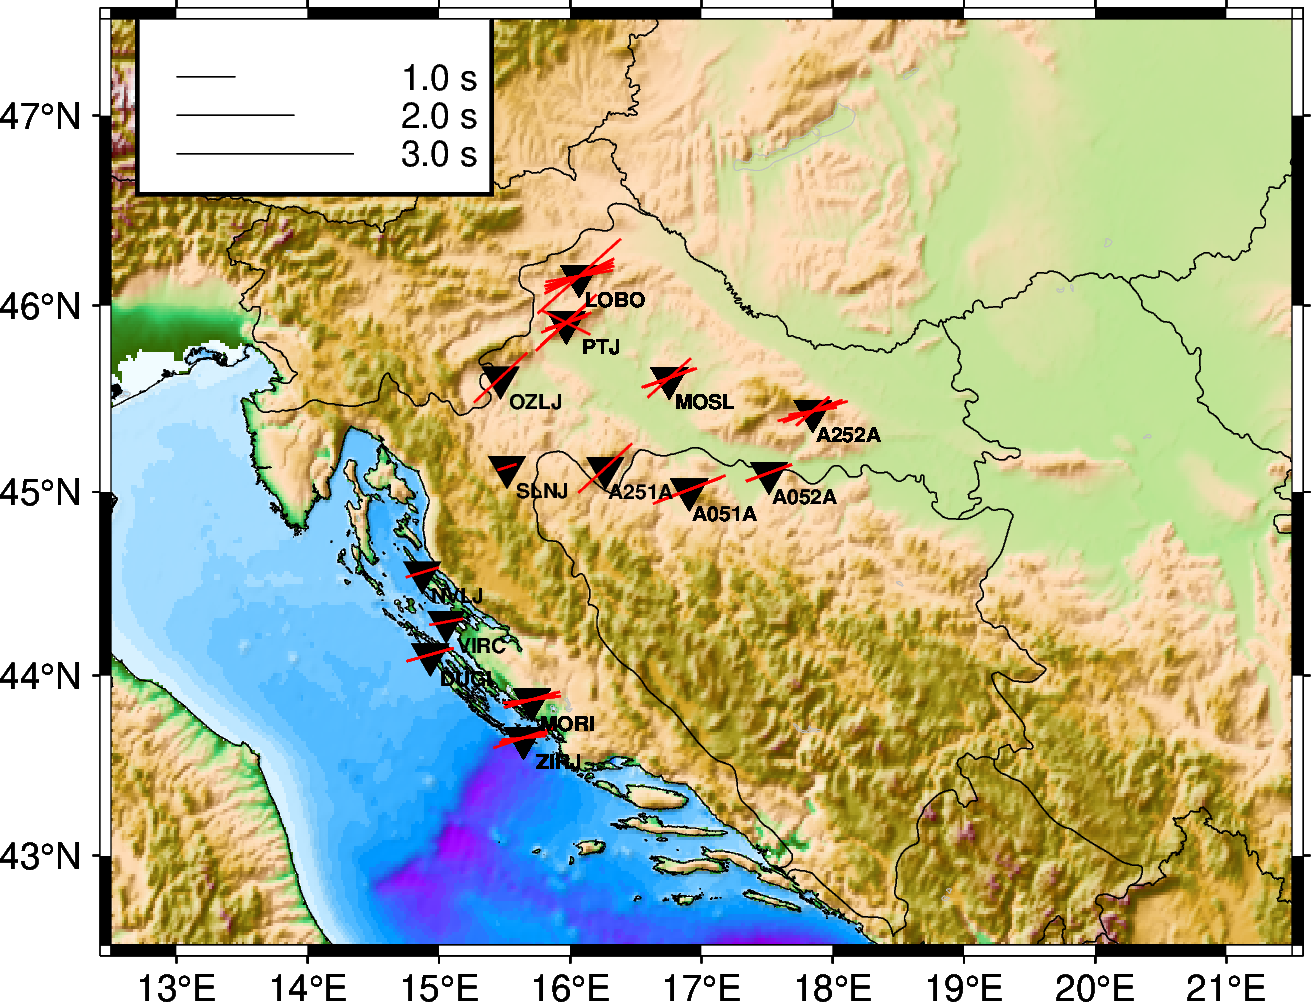

In [231]:
plot_splitting_map(df_category_good_only, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="0.5p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='red')

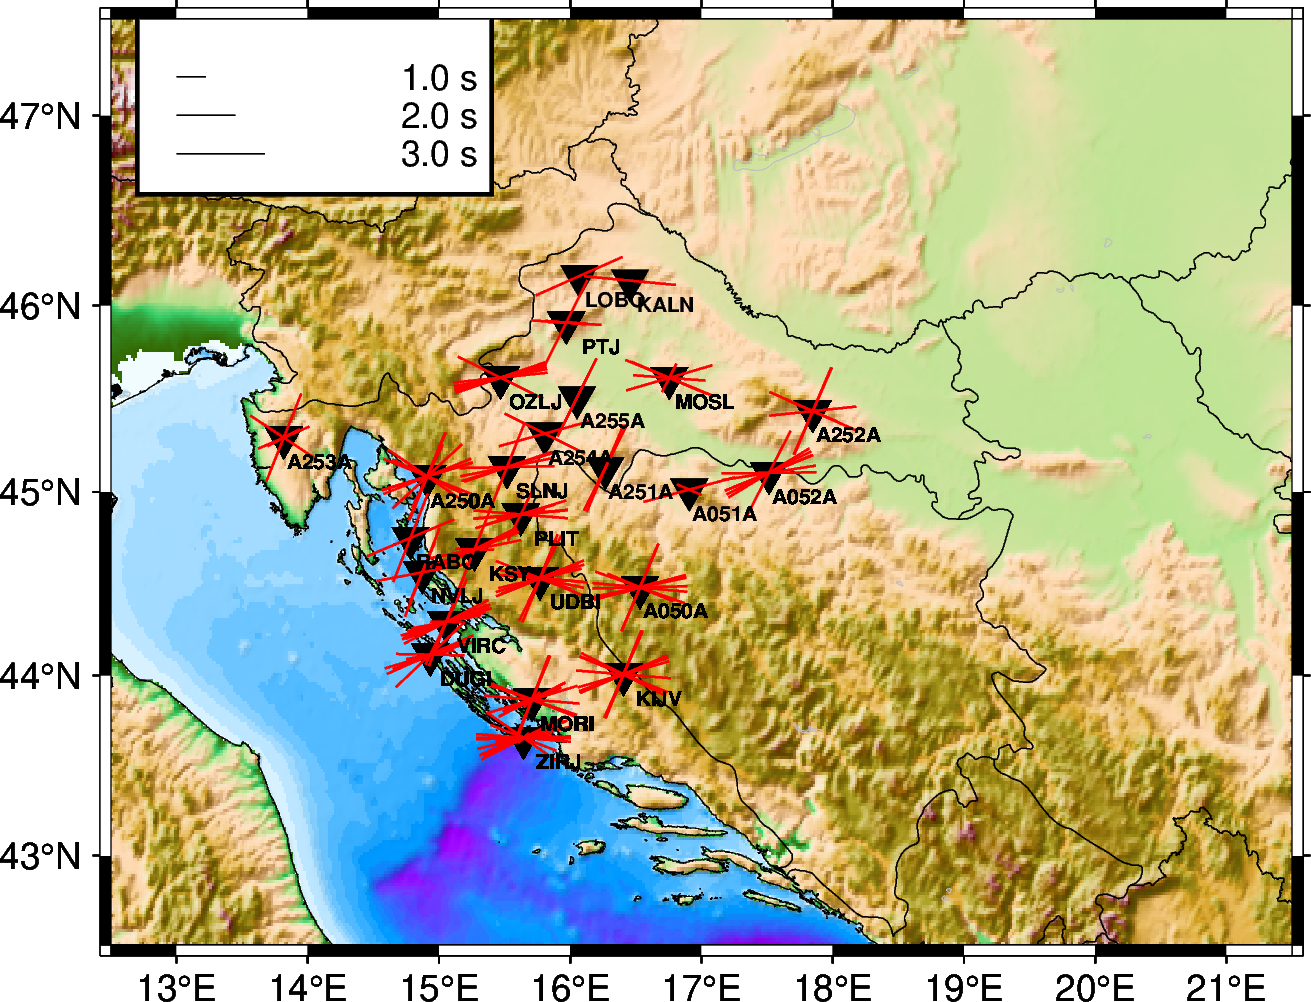

In [232]:
plot_splitting_map(dfdata_null, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.25, penwidth="0.5p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='red')

In [234]:
def plot_splitting_map(sks_meas_all, boxcoordinates,
                       dcoord=0.5,
                       figname='splitting_map.png',
                       frame=["a1f0.25", "WSen"],
                       topo_data="@earth_relief_01m",
                       colormap="etopo1",
                       proj="M5c",
                       markerstyle="cc",
                       markersizescale=0.03*2,
                       markerstyle_nocmap="c0.25c",
                       markercolor="blue",
                       pencolor='black',
                       penwidth="1p",
                       dtscale=0.5,
                       measurement_cmap=True,
                       markercolormap="viridis",
                       colorbar=True,
                      legend=True):
    '''
    Plot the shear wave splitting measurements using pygmt
    param sks_meas_all: pandas dataframe with `Longitude`, `Latitude`, `phi`, and `dt` columns.
    param boxcoordinates: list with minimum longitude, maximum longitude, minimum latitude, maximum latitude
    param dcoord: offset of the map from the given coordinates
    param figname: output figure name
    param topo_data: topographic data str
    param colormap: colormap for the topographic data. Defaults to None
    param proj: projection of the map
    param measurement_cmap: boolean. plot markers using the colormap
    param markerstyle: marker style for colormapped markers
    param markerstyle_nocmap: marker style without colormap
    param markercolor: marker color without colormap
    param pencolor: pen color for the splitting lines
    param dtscale: scale for delay time on the map
    '''
    minlon, maxlon = boxcoordinates[0], boxcoordinates[1]
    minlat, maxlat = boxcoordinates[2], boxcoordinates[3]
    minlon, maxlon, minlat, maxlat = (
        minlon - dcoord,
        maxlon + dcoord,
        minlat - dcoord,
        maxlat + dcoord,
    )

    res = "f"

    dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 45])

    fig = pygmt.Figure()
    # define figure configuration
    pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")

    fig.shift_origin(xshift="12.5c")

    pygmt.makecpt(cmap="gray", series=[-2, 0.3, 0.01])
    fig.grdimage(
        grid=dgrid,
        projection="M12c",
        frame=["a1f0.25", "WSen"],
        cmap=True,
        I = True
    )
    
    fig.coast( 
        water='lightblue', 
        shorelines=True
    )

    phivals = 90-sks_meas_all['phi'].values
    dtvals = dtscale*sks_meas_all['dt'].values
    
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="v0i+e",
        pen=penwidth+","+pencolor ,
        direction=[
            phivals,
            dtvals/2.5,        # skaliranje brzih osi sa obzirom na vrijeme 
        ],  # angle (from xaxis) and magnitude
    )
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="v0i+e",
        pen=penwidth+","+pencolor , 
        direction=[
            180+phivals,
            dtvals/2.5,        # skaliranje brzih osi sa obzirom na vrijeme
        ],  # angle (from xaxis) and magnitude

    )

    if legend:
        delaytimearrays = [1.0, 2.0, 3.0]
        ydiff = 0.2
        xdiff = 2
        yloc = (maxlat-dcoord+2*ydiff)
        xloc = minlon+dcoord
        fig.plot(x=xloc+xdiff/2+0.05, y=yloc-len(delaytimearrays)/2*ydiff-0.05, style=f"r{len(delaytimearrays)}/{len(delaytimearrays)/2}",
                 color="white", pen="1p,black")

        xloc += xdiff
        for dltime in delaytimearrays:
            yloc -= ydiff
            fig.plot(
                x=xloc-xdiff,
                y=yloc,
                style="v0i+e",
                pen='black',
                direction=[
                    [0],
                    [dtscale*dltime],
                ],  # angle (from xaxis) and magnitude
            )
            fig.text(x=xloc, y=yloc,
                     text=f"{dltime} s", font="0.3c,Helvetica")

    fig.show()
    fig.savefig(figname, crop=True, dpi=1080)

C:\Users\dodos\AppData\Local\Temp\ipykernel_9020\2107771871.py:55: SyntaxWarning: Short-form parameter (I) is not recommended. Use long-form parameter 'shading' instead.
  fig.grdimage(


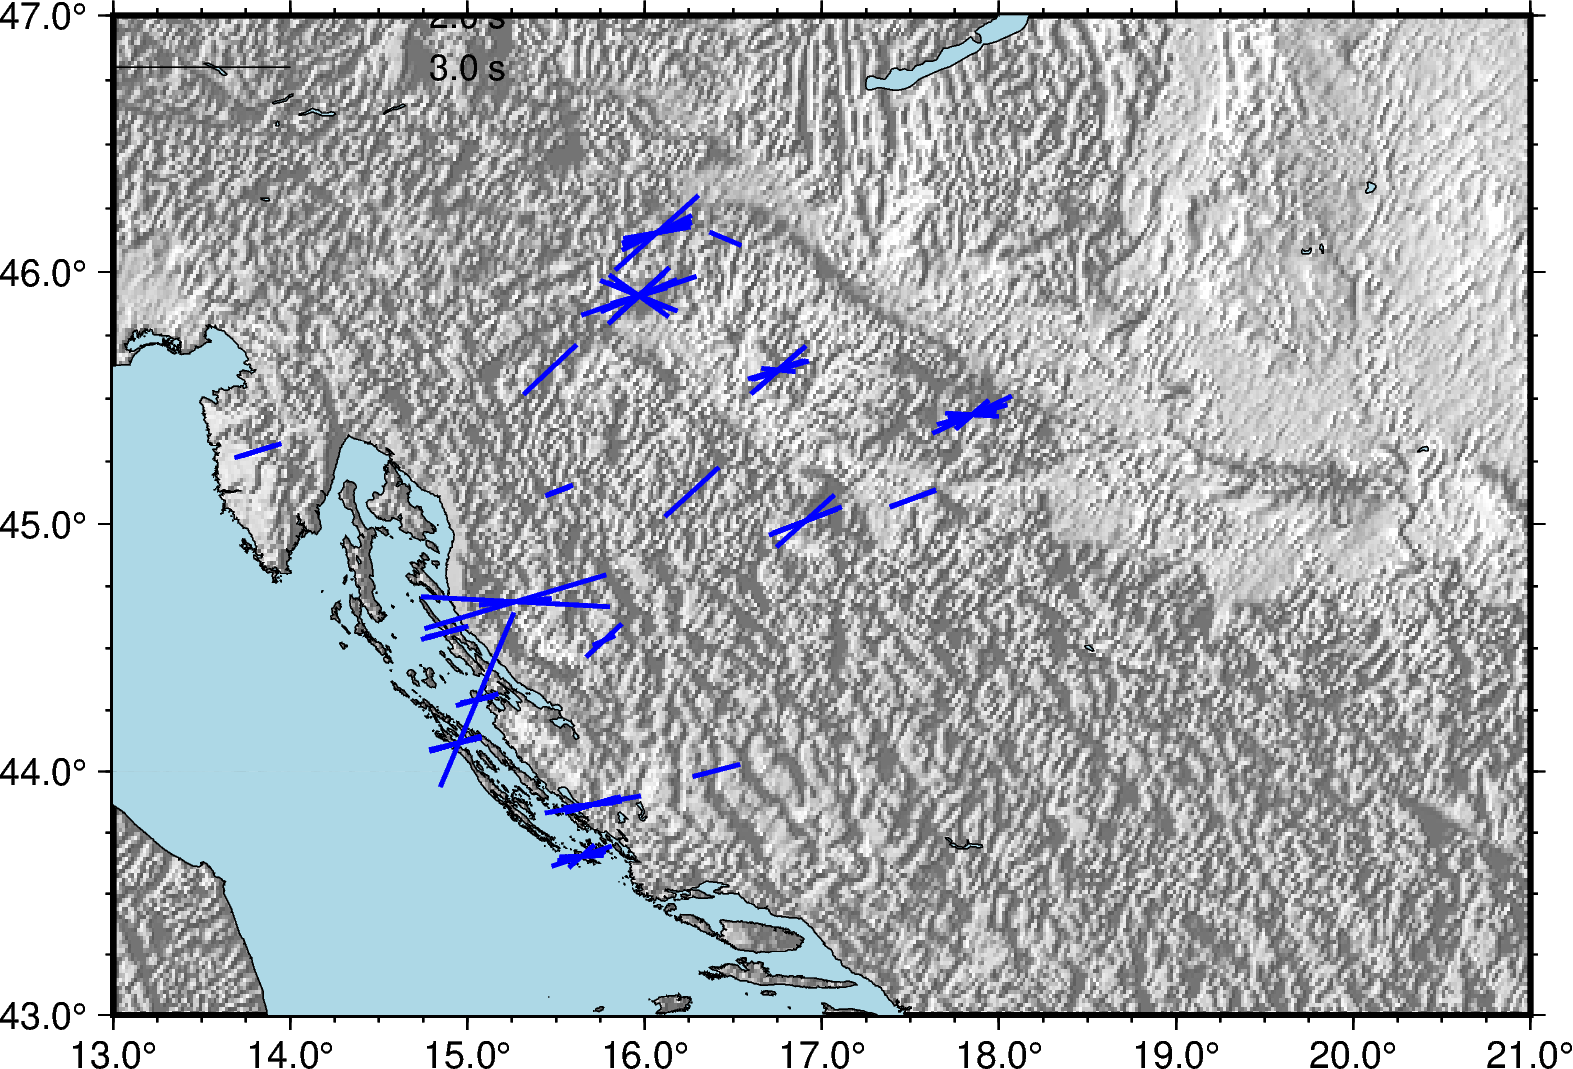

In [235]:
plot_splitting_map(df_category_good, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="1p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='blue')

C:\Users\dodos\AppData\Local\Temp\ipykernel_9020\2107771871.py:55: SyntaxWarning: Short-form parameter (I) is not recommended. Use long-form parameter 'shading' instead.
  fig.grdimage(


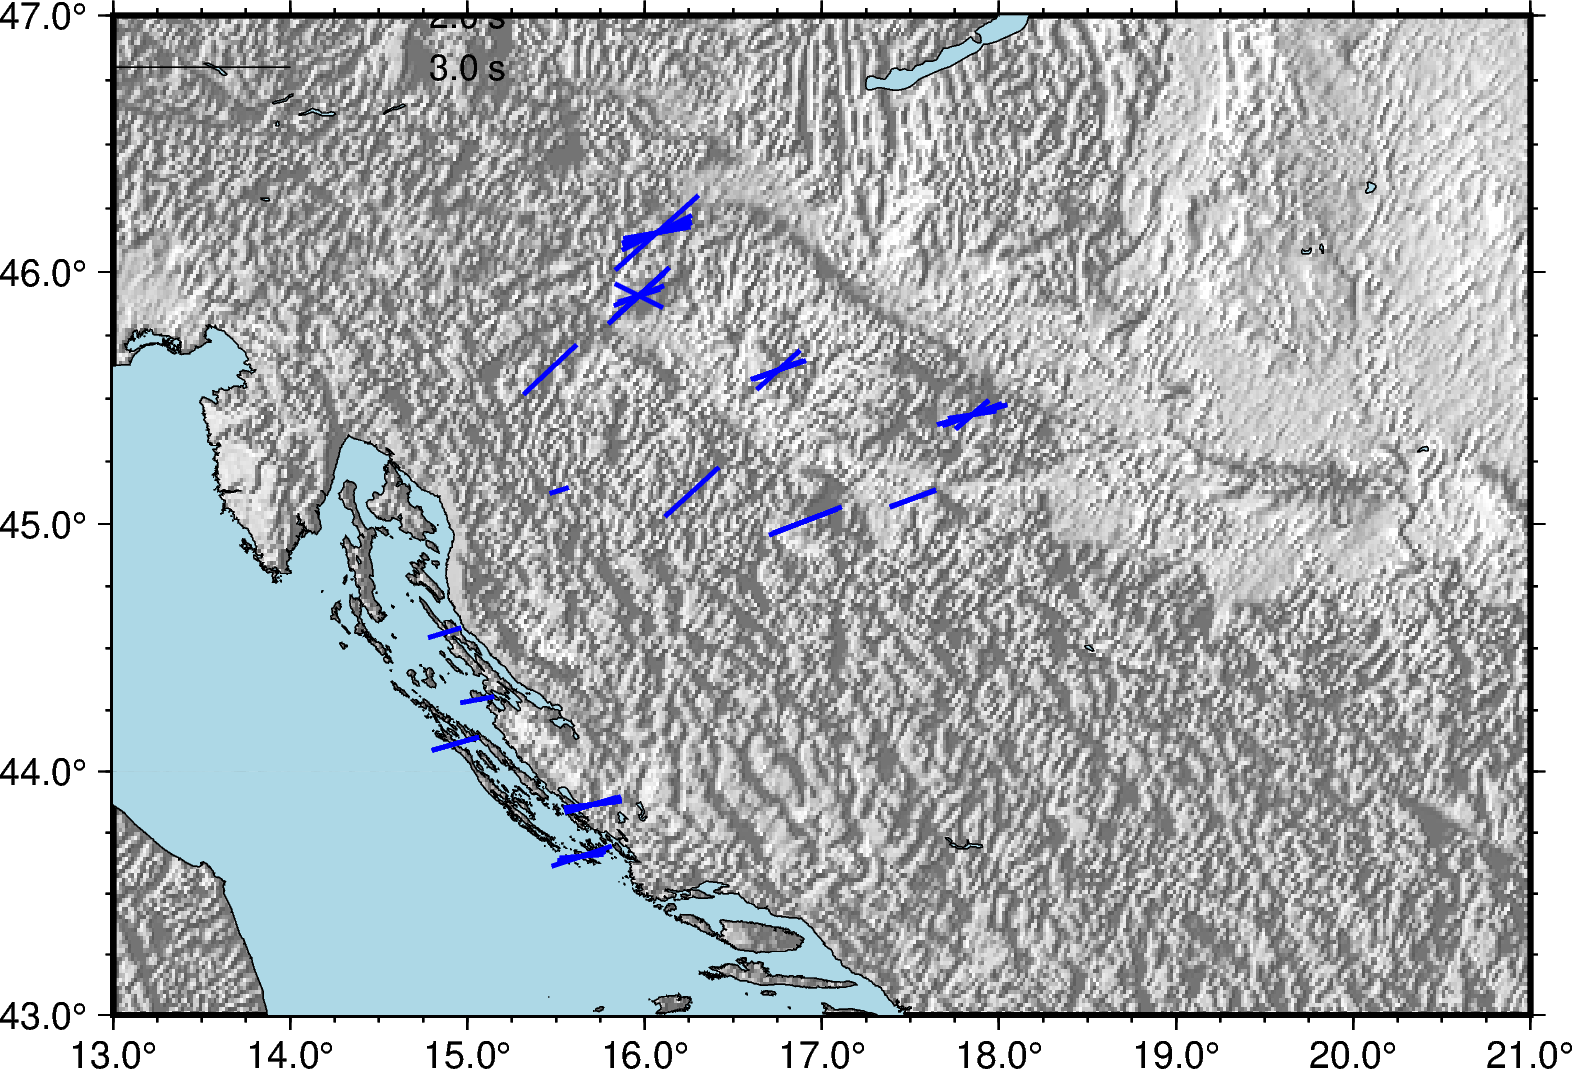

In [236]:
plot_splitting_map(df_category_good_only, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="1p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='blue')
    

In [238]:
import numpy as np
station_averages = {}
x=0
y=0
for station in stations['Name']:
    x=0
    y=0
    summ=0
    counter=0
    for phi in df_category_good.loc[df_category_good['Station'] == station]['phi']:
        x += np.sin(np.deg2rad(phi))
        y += np.sin(np.deg2rad(phi))
        if phi > 180:
            phi=phi-180
        summ+=phi
        counter+=1
    if counter > 0:    
        station_averages[station] = summ/counter
    else:
        station_averages[station] = np.nan
        #print(station, phi)
   # print(x)
  #  print(y)
    #print(np.arctan(y/x))
  #  if x != 0:
  #      print(np.arctan(y/x))
  #      station_averages[station] = np.rad2deg(np.arctan(y/x))
  #  else:
   #     station_averages[station] = np.nan
    #station_averages[station] = df_category_good.loc[df_category_good['Station'] == station]['phi']
print(station_averages)

{'A250A': nan, 'A251A': 47.48268, 'A252A': 69.680782, 'A253A': 72.63019, 'A254A': nan, 'A255A': nan, 'A050A': nan, 'A051A': 63.8505725, 'A052A': 69.809075, 'MOSL': 66.980565, 'DUGI': 74.52925, 'KALN': 112.90453000000002, 'KIJV': 75.44564, 'KSY': 83.79419, 'LOBO': 70.20824916666668, 'MORI': 78.44651666666667, 'NVLJ': 74.72905999999999, 'OZLJ': 46.85833, 'PLIT': nan, 'PTJ': 75.40137055555553, 'RABC': nan, 'SLNJ': 69.65511333333333, 'UDBI': 56.81098499999999, 'VIRC': 58.95223000000001, 'ZIRJ': 74.39763599999999}


In [239]:
station_averages_dict = {'Station':[],'Latitude':[],'Longitude':[], 'phi':[], 'dt':[]}
for index,row in stations.iterrows():
  #  print(row['Name'])
    #for x in station_averages[row['Name']]:
     #   print(x, row['Name'])
    
    
    station_averages_dict['Station'].append(row['Name'])
    station_averages_dict['Latitude'].append(row['latitude'])
    station_averages_dict['Longitude'].append(row['longitude'])
 #   station_averages_dict['phi'].append(station_averages[row['Name']].sum()/len(station_averages[row['Name']]))
    station_averages_dict['phi'].append(station_averages[row['Name']])
    station_averages_dict['dt'].append(1.5)
    
#for station in station_averages:
#    station_averages[station] = station_averages[station].sum()/len(station_averages[station])

In [240]:
station_averages['MOSL']

66.980565

In [241]:
plot_splitting_map(station_averages, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="3p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='red')

C:\Users\dodos\AppData\Local\Temp\ipykernel_9020\2107771871.py:55: SyntaxWarning: Short-form parameter (I) is not recommended. Use long-form parameter 'shading' instead.
  fig.grdimage(


KeyError: 'phi'

In [242]:
station_averages = pd.DataFrame(station_averages_dict, columns=['Station', 'Latitude', 'Longitude', "phi", "dt"])

station_averages['Latitude'] = pd.to_numeric(station_averages['Latitude'], errors='coerce')
station_averages['Longitude'] = pd.to_numeric(station_averages['Longitude'], errors='coerce')
station_averages['phi'] = pd.to_numeric(station_averages['phi'], errors='coerce')
station_averages['dt'] = pd.to_numeric(station_averages['dt'], errors='coerce')    

In [243]:
def plot_splitting_map_average(figure,sks_meas_all, boxcoordinates,
                       dcoord=0.5,
                       figname='splitting_map.png',
                       frame=["a1f0.25", "WSen"],
                       topo_data="@earth_relief_01m",
                       colormap="etopo1",
                       proj="M5c",
                       markerstyle="cc",
                       markersizescale=0.03*2,
                       markerstyle_nocmap="c0.25c",
                       markercolor="blue",
                       pencolor='black',
                       penwidth="1p",
                       dtscale=0.5,
                       measurement_cmap=True,
                       markercolormap="viridis",
                       colorbar=True,
                      legend=True):
    '''
    Plot the shear wave splitting measurements using pygmt
    param sks_meas_all: pandas dataframe with `Longitude`, `Latitude`, `phi`, and `dt` columns.
    param boxcoordinates: list with minimum longitude, maximum longitude, minimum latitude, maximum latitude
    param dcoord: offset of the map from the given coordinates
    param figname: output figure name
    param topo_data: topographic data str
    param colormap: colormap for the topographic data. Defaults to None
    param proj: projection of the map
    param measurement_cmap: boolean. plot markers using the colormap
    param markerstyle: marker style for colormapped markers
    param markerstyle_nocmap: marker style without colormap
    param markercolor: marker color without colormap
    param pencolor: pen color for the splitting lines
    param dtscale: scale for delay time on the map
    '''
    minlon, maxlon = boxcoordinates[0], boxcoordinates[1]
    minlat, maxlat = boxcoordinates[2], boxcoordinates[3]
    minlon, maxlon, minlat, maxlat = (
        minlon - dcoord,
        maxlon + dcoord,
        minlat - dcoord,
        maxlat + dcoord,
    )

    phivals = 90-sks_meas_all['phi'].values
    dtvals = dtscale*sks_meas_all['dt'].values
    fig = figure
    
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="v0i+e",
        pen=penwidth+","+pencolor ,
        direction=[
            phivals,
            dtvals/2.5,        # skaliranje brzih osi sa obzirom na vrijeme 
        ],  # angle (from xaxis) and magnitude
    )
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="v0i+e",
        pen=penwidth+","+pencolor , 
        direction=[
            180+phivals,
            dtvals/2.5,        # skaliranje brzih osi sa obzirom na vrijeme
        ],  # angle (from xaxis) and magnitude

    )

    if legend:
        delaytimearrays = [1.0, 2.0, 3.0]
        ydiff = 0.2
        xdiff = 2
        yloc = (maxlat-dcoord+2*ydiff)
        xloc = minlon+dcoord
        fig.plot(x=xloc+xdiff/2+0.05, y=yloc-len(delaytimearrays)/2*ydiff-0.05, style=f"r{len(delaytimearrays)}/{len(delaytimearrays)/2}",
                 color="white", pen="1p,black")

        xloc += xdiff
        for dltime in delaytimearrays:
            yloc -= ydiff
            fig.plot(
                x=xloc-xdiff,
                y=yloc,
                style="v0i+e",
                pen='black',
                direction=[
                    [0],
                    [dtscale*dltime],
                ],  # angle (from xaxis) and magnitude
            )
            fig.text(x=xloc, y=yloc,
                     text=f"{dltime} s", font="0.3c,Helvetica")
    return fig
    #fig.show()
    #fig.savefig(figname, crop=True, dpi=1080)

C:\Users\dodos\AppData\Local\Temp\ipykernel_9020\2690779524.py:13: SyntaxWarning: Short-form parameter (I) is not recommended. Use long-form parameter 'shading' instead.
  fig.grdimage(
plot [WARNING]: Vector direction = NaN near line 1. Skipped
plot [WARNING]: Vector direction = NaN near line 5. Skipped
plot [WARNING]: Vector direction = NaN near line 6. Skipped
plot [WARNING]: Vector direction = NaN near line 7. Skipped
plot [WARNING]: Vector direction = NaN near line 19. Skipped
plot [WARNING]: Vector direction = NaN near line 21. Skipped
plot [WARNING]: Vector direction = NaN near line 1. Skipped
plot [WARNING]: Vector direction = NaN near line 5. Skipped
plot [WARNING]: Vector direction = NaN near line 6. Skipped
plot [WARNING]: Vector direction = NaN near line 7. Skipped
plot [WARNING]: Vector direction = NaN near line 19. Skipped
plot [WARNING]: Vector direction = NaN near line 21. Skipped


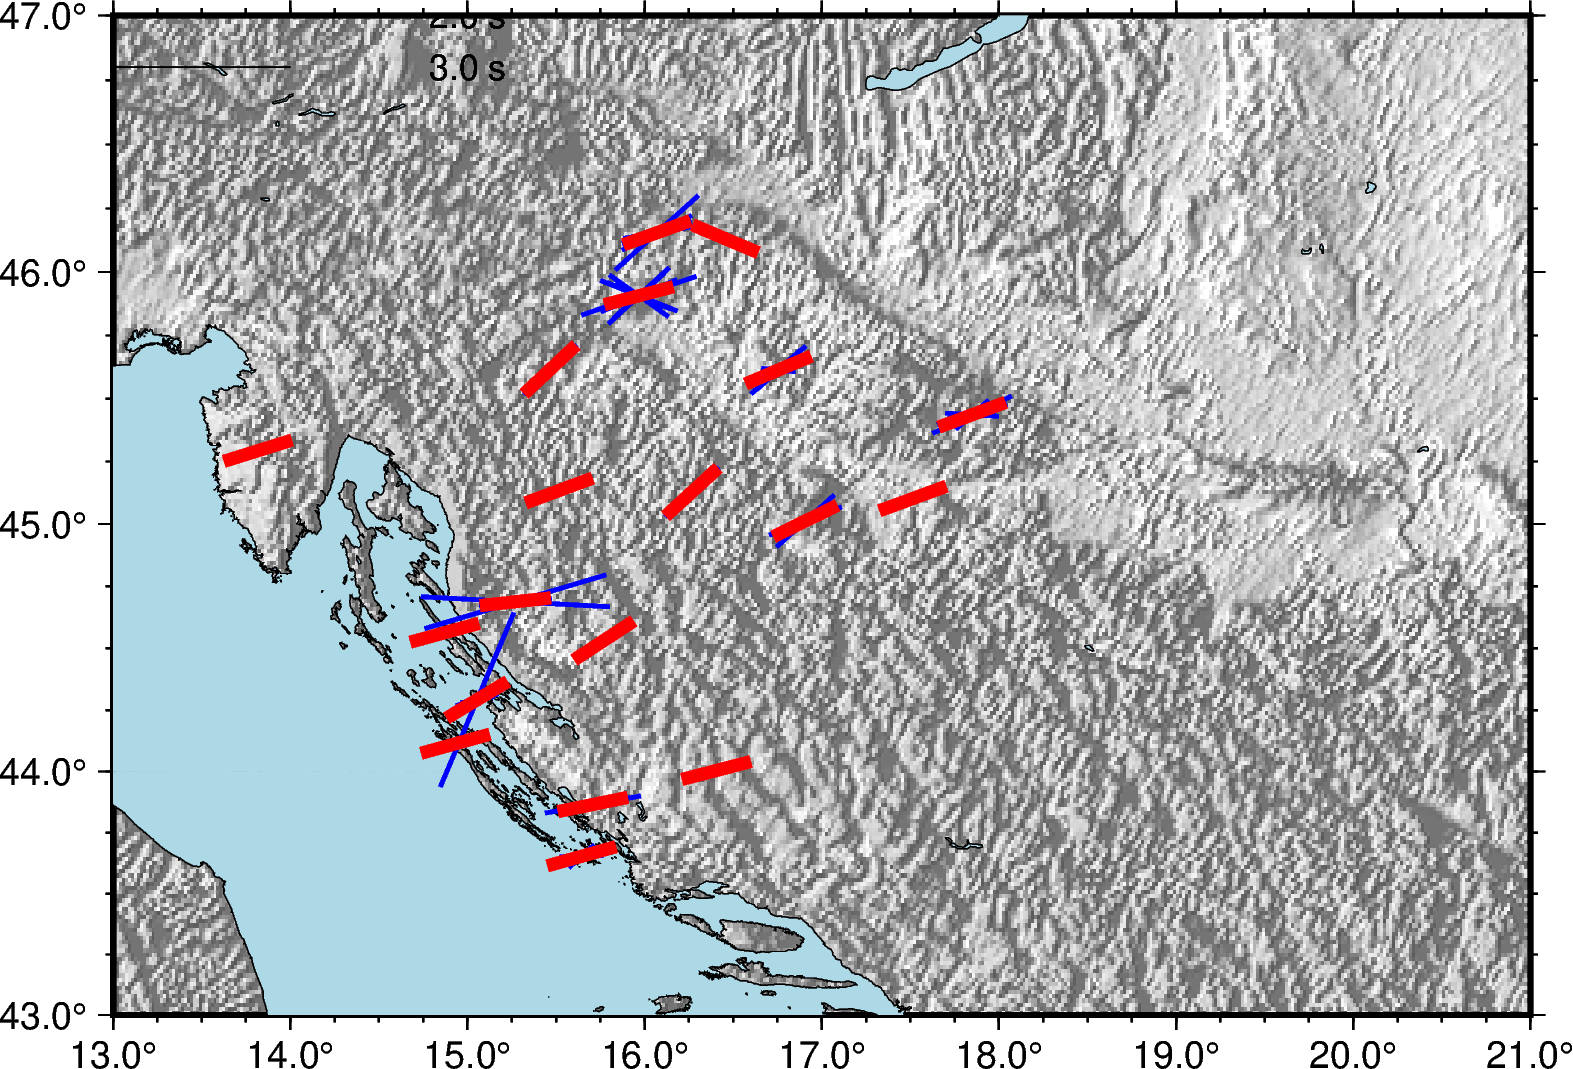

In [244]:
fig = pygmt.Figure()
res = "f"

dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 45])

#fig = pygmt.Figure()
# define figure configuration
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")

fig.shift_origin(xshift="12.5c")

pygmt.makecpt(cmap="gray", series=[-2, 0.3, 0.01])
fig.grdimage(
    grid=dgrid,
    projection="M12c",
    frame=["a1f0.25", "WSen"],
    cmap=True,
    I = True
    )
    
fig.coast( 
        water='lightblue', 
        shorelines=True
    )
fig_one = plot_splitting_map_average(fig, df_category_good, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="1p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='blue')
plot_splitting_map_average(fig_one, station_averages, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="3p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='red')
fig_one.show()

C:\Users\dodos\AppData\Local\Temp\ipykernel_9020\1902573946.py:11: SyntaxWarning: Short-form parameter (I) is not recommended. Use long-form parameter 'shading' instead.
  fig.grdimage(
plot [WARNING]: Vector direction = NaN near line 1. Skipped
plot [WARNING]: Vector direction = NaN near line 5. Skipped
plot [WARNING]: Vector direction = NaN near line 6. Skipped
plot [WARNING]: Vector direction = NaN near line 7. Skipped
plot [WARNING]: Vector direction = NaN near line 19. Skipped
plot [WARNING]: Vector direction = NaN near line 21. Skipped
plot [WARNING]: Vector direction = NaN near line 1. Skipped
plot [WARNING]: Vector direction = NaN near line 5. Skipped
plot [WARNING]: Vector direction = NaN near line 6. Skipped
plot [WARNING]: Vector direction = NaN near line 7. Skipped
plot [WARNING]: Vector direction = NaN near line 19. Skipped
plot [WARNING]: Vector direction = NaN near line 21. Skipped


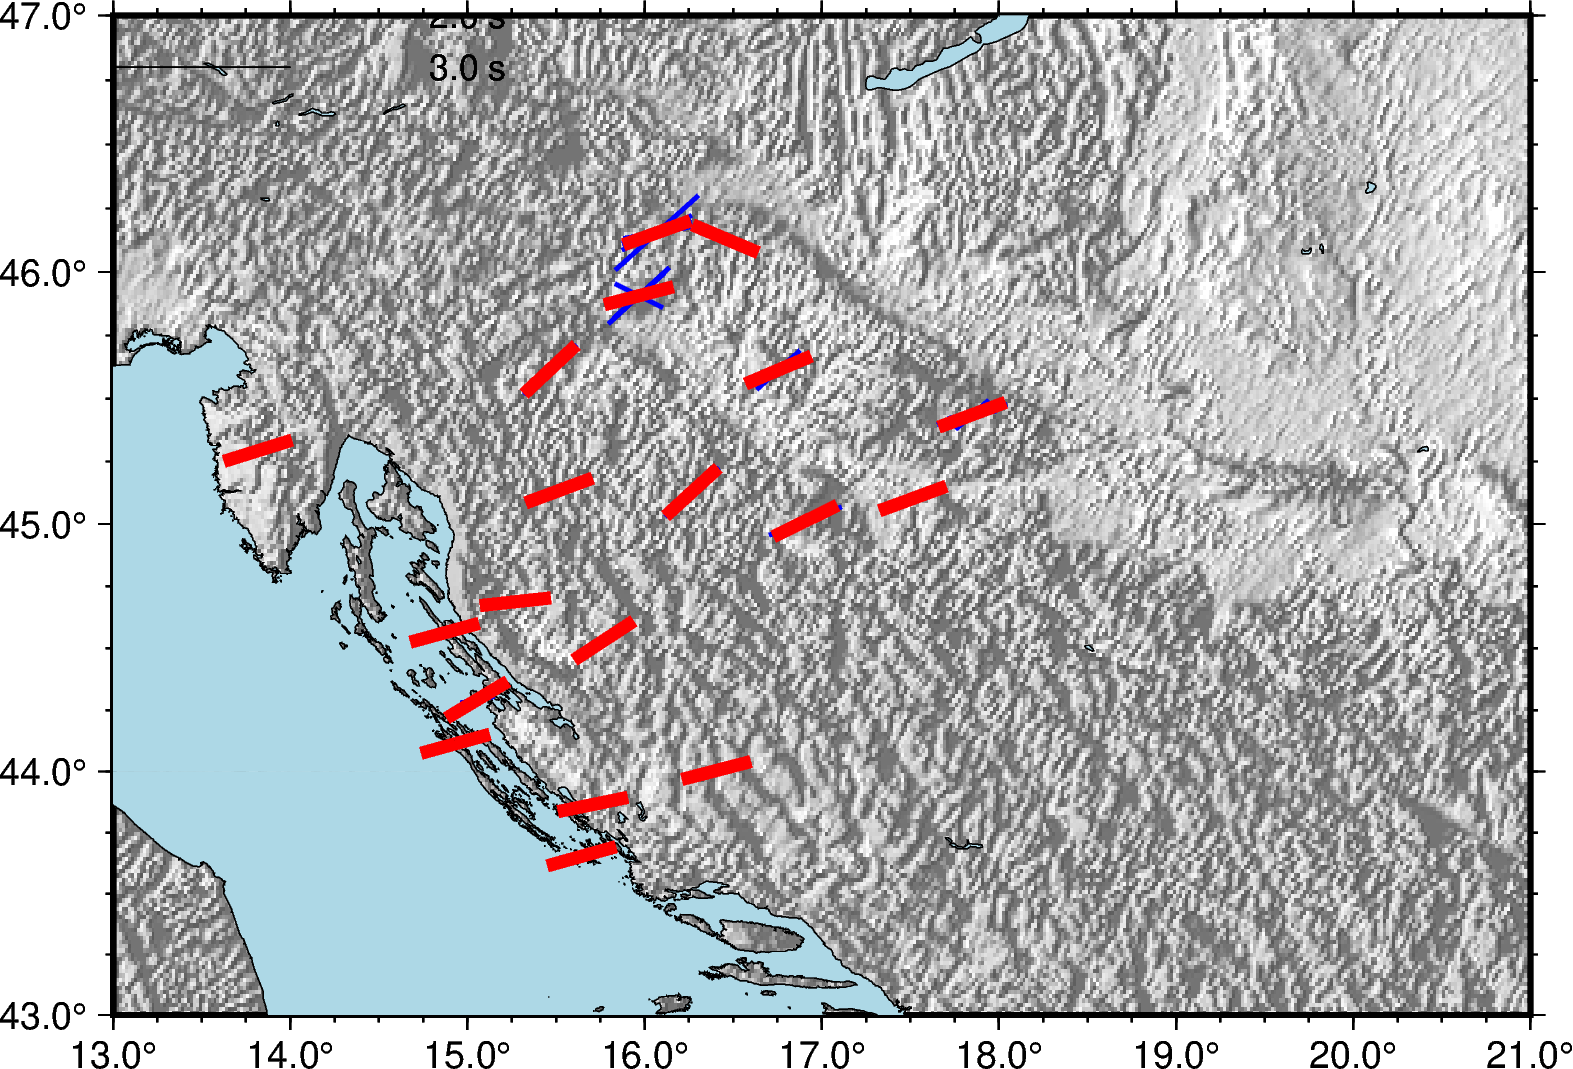

In [245]:
fig = pygmt.Figure()
res = "f"

dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 45])

pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")

fig.shift_origin(xshift="12.5c")

pygmt.makecpt(cmap="gray", series=[-2, 0.3, 0.01])
fig.grdimage(
    grid=dgrid,
    projection="M12c",
    frame=["a1f0.25", "WSen"],
    cmap=True,
    I = True
    )
    
fig.coast( 
        water='lightblue', 
        shorelines=True
    )
fig_one = plot_splitting_map_average(fig, df_category_good_only, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="1p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='blue')
plot_splitting_map_average(fig_one, station_averages, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="3p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='red')
fig_one.show()

In [246]:

station_averages = {}
for station in stations['Name']:

    summ=0
    counter=0
    for phi in df_category_good_only.loc[df_category_good_only['Station'] == station]['phi']:
        x += np.sin(np.deg2rad(phi))
        y += np.sin(np.deg2rad(phi))
        if phi > 180:
            phi=phi-180
        summ+=phi
        counter+=1
    if counter > 0:    
        station_averages[station] = summ/counter
    else:
        station_averages[station] = np.nan

In [247]:
station_averages = pd.DataFrame(station_averages_dict, columns=['Station', 'Latitude', 'Longitude', "phi", "dt"])

station_averages['Latitude'] = pd.to_numeric(station_averages['Latitude'], errors='coerce')
station_averages['Longitude'] = pd.to_numeric(station_averages['Longitude'], errors='coerce')
station_averages['phi'] = pd.to_numeric(station_averages['phi'], errors='coerce')
station_averages['dt'] = pd.to_numeric(station_averages['dt'], errors='coerce')    

C:\Users\dodos\AppData\Local\Temp\ipykernel_9020\1902573946.py:11: SyntaxWarning: Short-form parameter (I) is not recommended. Use long-form parameter 'shading' instead.
  fig.grdimage(
plot [WARNING]: Vector direction = NaN near line 1. Skipped
plot [WARNING]: Vector direction = NaN near line 5. Skipped
plot [WARNING]: Vector direction = NaN near line 6. Skipped
plot [WARNING]: Vector direction = NaN near line 7. Skipped
plot [WARNING]: Vector direction = NaN near line 19. Skipped
plot [WARNING]: Vector direction = NaN near line 21. Skipped
plot [WARNING]: Vector direction = NaN near line 1. Skipped
plot [WARNING]: Vector direction = NaN near line 5. Skipped
plot [WARNING]: Vector direction = NaN near line 6. Skipped
plot [WARNING]: Vector direction = NaN near line 7. Skipped
plot [WARNING]: Vector direction = NaN near line 19. Skipped
plot [WARNING]: Vector direction = NaN near line 21. Skipped


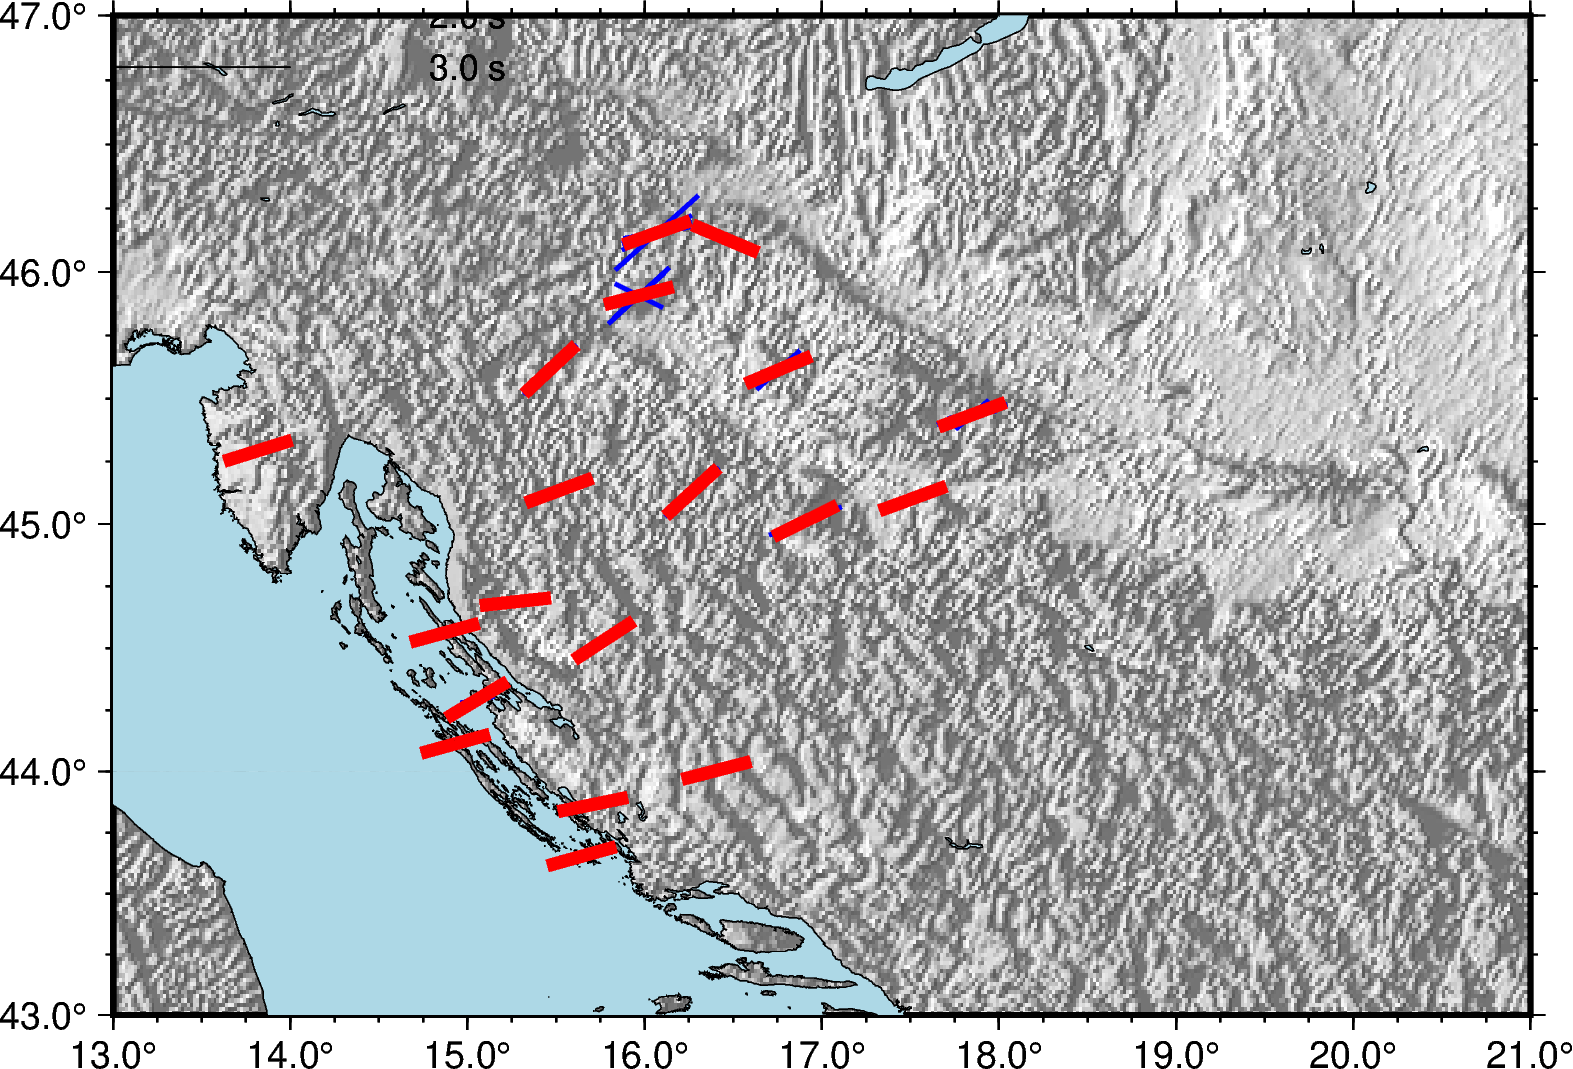

In [248]:
fig = pygmt.Figure()
res = "f"

dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 45])

pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")

fig.shift_origin(xshift="12.5c")

pygmt.makecpt(cmap="gray", series=[-2, 0.3, 0.01])
fig.grdimage(
    grid=dgrid,
    projection="M12c",
    frame=["a1f0.25", "WSen"],
    cmap=True,
    I = True
    )
    
fig.coast( 
        water='lightblue', 
        shorelines=True
    )
fig_one = plot_splitting_map_average(fig, df_category_good_only, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="1p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='blue')
plot_splitting_map_average(fig_one, station_averages, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="3p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='red')
fig_one.show()

In [249]:
station_averages

Station   Latitude  Longitude         phi   dt
0    A250A  45.084000  14.910600         NaN  1.5
1    A251A  45.128600  16.266400   47.482680  1.5
2    A252A  45.435600  17.848200   69.680782  1.5
3    A253A  45.292600  13.816700   72.630190  1.5
4    A254A  45.314800  15.805000         NaN  1.5
5    A255A  45.509000  16.050700         NaN  1.5
6    A050A  44.481800  16.531300         NaN  1.5
7    A051A  45.012500  16.906900   63.850572  1.5
8    A052A  45.102600  17.513900   69.809075  1.5
9     MOSL  45.613500  16.754400   66.980565  1.5
10    DUGI  44.113100  14.931800   74.529250  1.5
11    KALN  46.131166  16.455717  112.904530  1.5
12    KIJV  44.004883  16.404696   75.445640  1.5
13     KSY  44.688190  15.270395   83.794190  1.5
14    LOBO  46.155100  16.068600   70.208249  1.5
15    MORI  43.866017  15.707297   78.446517  1.5
16    NVLJ  44.563470  14.871050   74.729060  1.5
17    OZLJ  45.615270  15.467266   46.858330  1.5
18    PLIT  44.878389  15.623055         NaN  1.5
19     PTJ  45.907328  15.968193   75.401371  1.5
20    RABC  44.750429  14.782104         NaN  1.5
21    SLNJ  45.134437  15.517110   69.655113  1.5
22    UDBI  44.531422  15.769351   56.810985  1.5
23    VIRC  44.292497  15.053954   58.952230  1.5
24    ZIRJ  43.654255  15.643891   74.397636  1.5

In [250]:
import numpy as np
import pycircstat as pc

In [251]:
np.rad2deg(pc.mean(np.deg2rad([39,31,220])))

30.013638936808157

In [252]:
pc.mean_ci_limits(np.deg2rad([39,31,34]))

array(0.09306767)

In [253]:
station_averages = {}
for station in stations['Name']:
    station_averages[station] = [np.rad2deg(pc.mean(np.deg2rad(df_category_good.loc[df_category_good['Station'] == station]['phi']))), len(df_category_good.loc[df_category_good['Station'] == station]['phi'])]


C:\Users\dodos\anaconda3\envs\pygmt\lib\site-packages\pycircstat\descriptive.py:339: RuntimeWarning: invalid value encountered in cdouble_scalars
  return ((w * np.exp(1j * alpha * axial_correction)).sum(axis=axis) /


In [254]:
station_averages

{'A250A': [nan, 0],
 'A251A': [47.48268, 1],
 'A252A': [262.8446518854278, 10],
 'A253A': [162.63018999999971, 2],
 'A254A': [nan, 0],
 'A255A': [nan, 0],
 'A050A': [nan, 0],
 'A051A': [259.0590546532864, 4],
 'A052A': [249.809075, 2],
 'MOSL': [285.7523320183772, 12],
 'DUGI': [74.52909191062174, 5],
 'KALN': [292.90453, 1],
 'KIJV': [75.44564, 1],
 'KSY': [65.91164998157996, 3],
 'LOBO': [254.75484116763408, 12],
 'MORI': [78.05341728963114, 9],
 'NVLJ': [74.72894522912958, 3],
 'OZLJ': [46.85833, 1],
 'PLIT': [nan, 0],
 'PTJ': [290.6952262395535, 18],
 'RABC': [nan, 0],
 'SLNJ': [249.6548124759904, 3],
 'UDBI': [326.81098499999996, 2],
 'VIRC': [106.82367922517716, 3],
 'ZIRJ': [74.46848264822351, 10]}

In [90]:
import matplotlib.pyplot as plt
from rf import read_rf, rfstats

9 Trace(s) in Stream:
CX.PB01..BHE | 2011-02-25T13:15:18.169539Z - 2011-02-25T13:17:18.169539Z | 5.0 Hz, 601 samples
CX.PB01..BHN | 2011-02-25T13:15:18.169539Z - 2011-02-25T13:17:18.169539Z | 5.0 Hz, 601 samples
CX.PB01..BHZ | 2011-02-25T13:15:18.169539Z - 2011-02-25T13:17:18.169539Z | 5.0 Hz, 601 samples
CX.PB01..BHE | 2011-03-06T14:40:39.719539Z - 2011-03-06T14:42:39.719539Z | 5.0 Hz, 601 samples
CX.PB01..BHN | 2011-03-06T14:40:39.719538Z - 2011-03-06T14:42:39.719538Z | 5.0 Hz, 601 samples
CX.PB01..BHZ | 2011-03-06T14:40:39.719539Z - 2011-03-06T14:42:39.719539Z | 5.0 Hz, 601 samples
CX.PB01..BHE | 2011-05-13T22:54:13.319538Z - 2011-05-13T22:56:13.319538Z | 5.0 Hz, 601 samples
CX.PB01..BHN | 2011-05-13T22:54:13.319536Z - 2011-05-13T22:56:13.319536Z | 5.0 Hz, 601 samples
CX.PB01..BHZ | 2011-05-13T22:54:13.319538Z - 2011-05-13T22:56:13.319538Z | 5.0 Hz, 601 samples

Stats:
           network: CX
          station: PB01
         location: 
          channel: BHE
        starttime: 2011-0

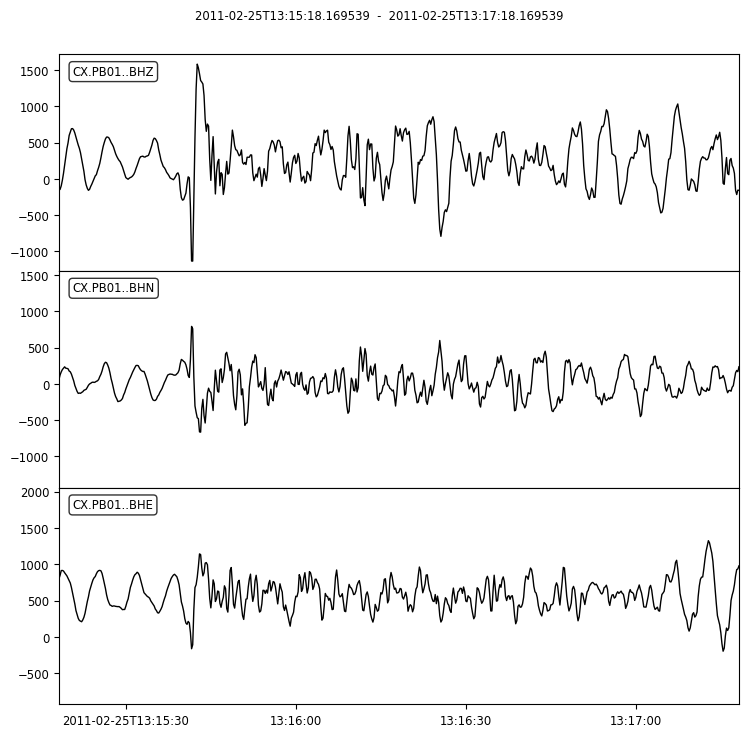

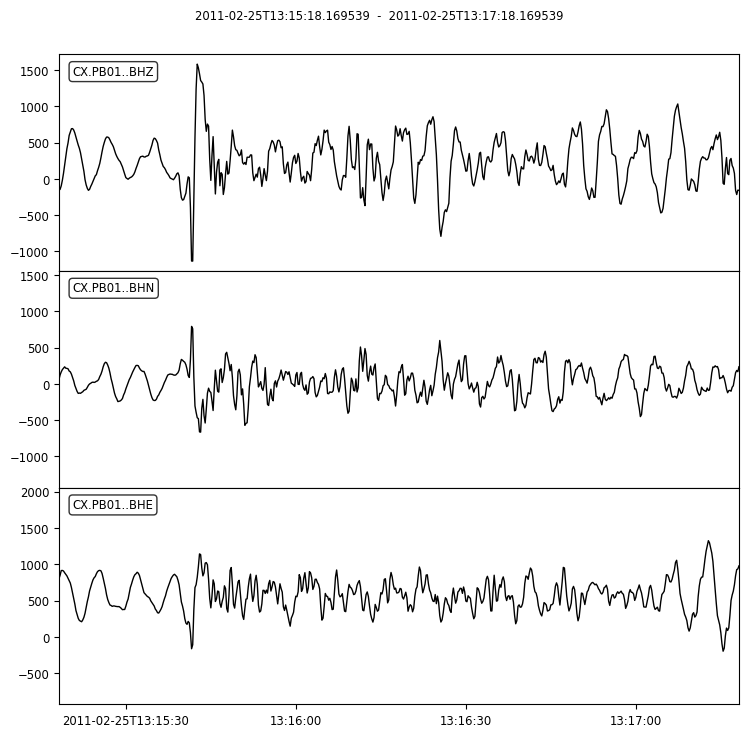

In [91]:
stream = read_rf()
print(stream)
print('\nStats:\n', stream[0].stats)
stream[:3].plot()

In [92]:
rffile = r'C:\Users\dodos\Dominik - podatci\A051A\A051A_2016011_163805.BHN.mseed'
stream = read_rf(rffile, 'MSEED')
ppoints = stream.ppoints(pp_depth=10, pp_phase='S', model='iasp91')

KeyError: 'slowness'

In [144]:
from obspy import read
st = read(rffile)
tr = st[0]
print(tr.stats)   

         network: Z3
         station: A051A
        location: 
         channel: BHN
       starttime: 2016-01-11T16:38:05.905000Z
         endtime: 2016-01-11T17:38:05.905000Z
   sampling_rate: 50.0
           delta: 0.02
            npts: 180001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 394, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 201728})


In [94]:
import os

import matplotlib.pyplot as plt
import numpy as np
from obspy import read_inventory, read_events, UTCDateTime as UTC
from obspy.clients.fdsn import Client
from rf import read_rf, RFStream
from rf import get_profile_boxes, iter_event_data, IterMultipleComponents
from rf.imaging import plot_profile_map
from rf.profile import profile
from tqdm import tqdm

data = os.path.join('data', '')
invfile = data + 'rf_profile_stations.xml'
catfile = data + 'rf_profile_events.xml'
datafile = data + 'rf_profile_data.h5'
rffile = data + 'rf_profile_rfs.h5'
profilefile = data + 'rf_profile_profile.h5'
if not os.path.exists(data):  # create data folder if necessary
    os.mkdir(data)

ModuleNotFoundError: No module named 'tqdm'

In [98]:
rfstats(event=tr)

AttributeError: station_latitude

In [152]:
rfstats(event=st1, station=[45.012500,16.906900,0],
            phase='P', dist_range='default', tt_model='iasp91',
            pp_depth=10, pp_phase='S', model='iasp91')

ValueError: No origin

In [138]:
from obspy import core


In [116]:
from obspy.core.event import Origin
origin = Origin()
#origin.resource_id = 'smi:ch.ethz.sed/origin/37465'
origin.time = UTCDateTime(0)
origin.latitude = 12
#origin.latitude_errors.uncertainty = 0.01
#origin.latitude_errors.confidence_level = 95.0
origin.longitude = 42
origin.depth_type = 'from location'
print(origin)  

Origin
	 resource_id: ResourceIdentifier(id="smi:local/2ab5bc1a-2fe0-44fe-9cbe-18ef0e891d9b")
	        time: UTCDateTime(1970, 1, 1, 0, 0)
	   longitude: 42.0
	    latitude: 12.0
	  depth_type: 'from location'


In [115]:
from obspy import UTCDateTime

In [117]:
15-Apr-2016 14:11:26

SyntaxError: invalid syntax (898535766.py, line 1)

In [119]:
st.origin = Origin()
#origin.resource_id = 'smi:ch.ethz.sed/origin/37465'
st.origin.time = UTCDateTime(0)
st.origin.latitude = 12
#origin.latitude_errors.uncertainty = 0.01
#origin.latitude_errors.confidence_level = 95.0
st.origin.longitude = 42
st.origin.depth_type = 'from location'
print(origin)  

Origin
	 resource_id: ResourceIdentifier(id="smi:local/2ab5bc1a-2fe0-44fe-9cbe-18ef0e891d9b")
	        time: UTCDateTime(1970, 1, 1, 0, 0)
	   longitude: 42.0
	    latitude: 12.0
	  depth_type: 'from location'


In [148]:
core.event.Event.prefered_origins

AttributeError: type object 'Event' has no attribute 'prefered_origins'

In [145]:
st1 = core.event.Event(st)

In [158]:
import copy
from itertools import chain

from obspy.core.event.header import (
    EventType, EventTypeCertainty, EventDescriptionType)
from obspy.core.event.resourceid import ResourceIdentifier
from obspy.core.util.misc import _yield_resource_id_parent_attr
from obspy.imaging.source import plot_radiation_pattern, _setup_figure_and_axes


from obspy.base import _event_type_class_factory, CreationInfo


__Event = _event_type_class_factory(
    "__Event",
    class_attributes=[("resource_id", ResourceIdentifier),
                      ("event_type", EventType),
                      ("event_type_certainty", EventTypeCertainty),
                      ("creation_info", CreationInfo),
                      ("preferred_origin_id", ResourceIdentifier),
                      ("preferred_magnitude_id", ResourceIdentifier),
                      ("preferred_focal_mechanism_id", ResourceIdentifier)],
    class_contains=['event_descriptions', 'comments', 'picks', 'amplitudes',
                    'focal_mechanisms', 'origins', 'magnitudes',
                    'station_magnitudes'])


ModuleNotFoundError: No module named 'obspy.base'

In [160]:
from obspy import read_events

catalog = read_events(rffile, format='MSEED')
print(catalog)

TypeError: Format "MSEED" is not supported. Supported types: QUAKEML, NLLOC_HYP, CMTSOLUTION, EVT, FNETMT, FOCMEC, GSE2, HYPODDPHA, IMS10BULLETIN, MCHEDR, NDK, NORDIC, SC3ML, SCARDEC, ZMAP

In [161]:
from rf import read_rf
stream = read_rf(rffile)

In [164]:
from obspy import read
st = read(rffile)

In [166]:
from rf import rfstats
stats = rfstats(station='A051A', event=st[0], phase='S', dist_range=(30,90))
for tr in stream:
     tr.stats.update(stats)

AttributeError: 'Trace' object has no attribute 'preferred_origin'

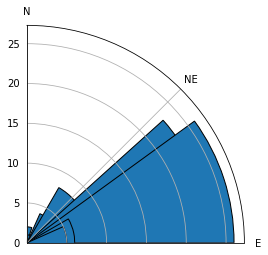

In [201]:
import numpy as np
import matplotlib.pyplot as plt

N = 15
bottom = 0
max_height = 4

#theta = np.linspace(0.0, 0.5 * np.pi, N, endpoint=False)
#radii = max_height*np.random.rand(N)
#width = (2*np.pi) / N
angles=list()
for index,row in df_category_good_only.iterrows():
    angles.append(np.deg2rad(row['phi']%90))
    
theta = np.linspace(0.0, 0.5 * np.pi, N, endpoint=False)    
#width = 10
#radii = [0,np.pi/6, np.pi/4, np.pi/3, np.pi/2]
#radii = 5
counts, bins = np.histogram(angles, bins=15)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, counts, width=width, bottom=bottom, edgecolor='black')

ax.set_thetamin(0)
ax.set_thetamax(90)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Use custom colors and opacity
#for r, bar in zip(radii, bars):
#    bar.set_facecolor('red')
#    bar.set_alpha(0.8)
#edgecolor='C0'
#ax.bar(align='edge', width=widths,
                    # edgecolor='C0', fill=False, linewidth=1)
for r_label in ax.get_yticklabels():
    r_label.set_text('')
ax.set_xticks([0,np.pi/4,np.pi/2])
ax.set_xticklabels([r'N', r'NE', r'E'])
plt.show()

In [202]:
theta

array([0.        , 0.10471976, 0.20943951, 0.31415927, 0.41887902,
       0.52359878, 0.62831853, 0.73303829, 0.83775804, 0.9424778 ,
       1.04719755, 1.15191731, 1.25663706, 1.36135682, 1.46607657])

In [203]:
theta = np.linspace(0.0, 0.5 * np.pi, N, endpoint=False)

In [207]:
import pygmt 
import os
import geopandas as gpd

feature_id
feature
type
comment
plate1
plate2
level
length
geometry


C:\Users\dodos\AppData\Local\Temp\ipykernel_9020\837249053.py:38: SyntaxWarning: Short-form parameter (I) is not recommended. Use long-form parameter 'shading' instead.
  fig.grdimage(
grdimage [WARNING]: 8 annotations along the bottom border were skipped due to crowding.
grdimage [WARNING]: Crowding decisions is controlled by MAP_ANNOT_MIN_SPACING, currently set to 26.1955p.
grdimage [WARNING]: Decrease or increase MAP_ANNOT_MIN_SPACING to see more or fewer annotations, with 0 showing all annotations.


<class 'geopandas.geodataframe.GeoDataFrame'>


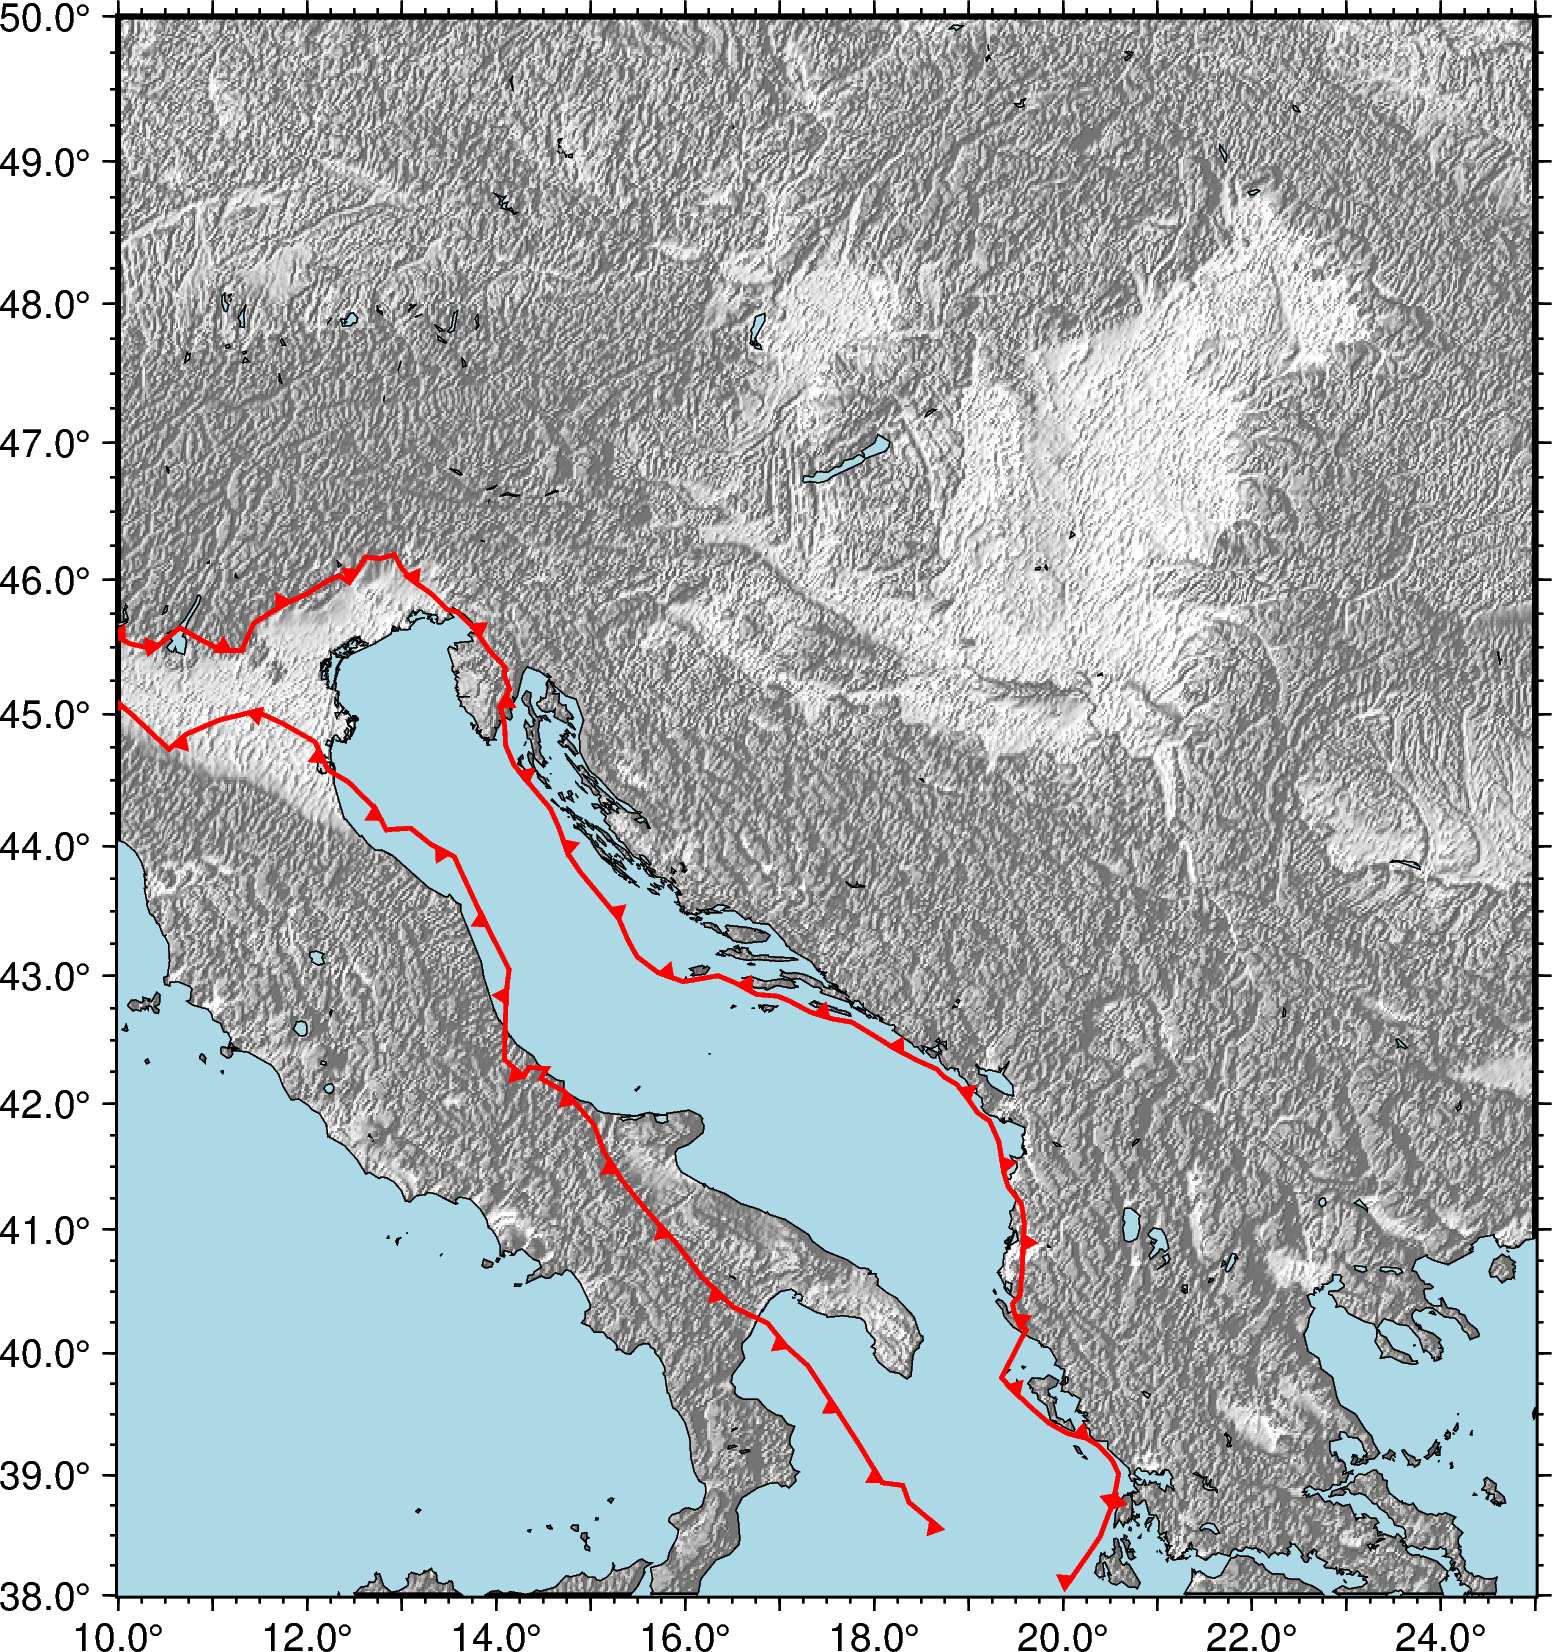

In [214]:
# ountiesShp = os.path.join(r"C:\Users\dodos\diplomski\sjever\global_tectonics\global_tectonics\plates&provinces\shp","plates.shp")
countiesShp = os.path.join(r"C:\Users\dodos\diplomski\sjever\global_tectonics\global_tectonics\polygon_data","GSHHS_I_L1.shp")
SHP_FILE = os.path.join(r"C:\Users\dodos\diplomski\sjever\global_tectonics\global_tectonics\plates&provinces\shp","plate_boundaries.shp")
oc_boundaries = os.path.join(r"C:\Users\dodos\diplomski\sjever\global_tectonics\global_tectonics\plates&provinces\shp","plate_boundaries.shp")

minlon, maxlon = 10, 25
minlat, maxlat = 38, 50


gdf = gpd.read_file(SHP_FILE)

all_data = []
for item in gdf:
    print(item)
#all_data.append(gdf[gdf["subplate"]=="Adriatic"])
#all_data.append(gdf[gdf["COUNTYENG"]=="Tainan City"])
#print(all_data[0])

# Define region of interest around Yosemite valley
region = [minlon, maxlon, minlat, maxlat]

# Load sample grid (3 arc-seconds global relief) in target area
grid = pygmt.datasets.load_earth_relief(resolution="01m", region=region)


# calculate the reflection of a light source projecting from west to east
# (azimuth of 270 degrees) and at a latitude of 30 degrees from the horizon
dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 30])

fig = pygmt.Figure()
# define figure configuration
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")

# Shift plot origin of the second map by 12.5 cm in x direction
fig.shift_origin(xshift="12.5c")

pygmt.makecpt(cmap="gray", series=[-2, 0.3, 0.01])
fig.grdimage(
    grid=dgrid,
    projection="M12c",
    frame=["a1f0.25", "WSen"],
    cmap=True,
    I = True
)
fig.coast( 
    water='lightblue', 
    shorelines=True)

datas = gdf.loc[gdf['plate2'] == 'Adriatic']#['geometry']

#for data_shp in all_data:
#    fig.plot(data=data_shp,color="white", pen=["0.02c", 'white'])
print(type(datas))
frontal_thrust = datas.loc[datas['feature'] == 'Dinaric Frontal Thrust']
fig.plot(data=datas, pen="1p,red", style='f0.7c/0.1c+l+t',color="red" )

fig.show()